# Mercedes-Benz Greener Manufacturing.

## DESCRIPTION
### Reduce the time a Mercedes-Benz spends on the test bench.

## Problem Statement Scenario:
#### Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.
#### To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.
#### You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

## Following actions should be performed:

#### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
#### Check for null and unique values for test and train sets.
#### Apply label encoder.
#### Perform dimensionality reduction.
#### Predict your test_df values using XGBoost.

<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Import necessary modules</h2></center>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 999

<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Load Data</h2></center>

In [2]:
import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\input\merc-test.csv
.\input\merc-train.csv
.\input\test.zip
.\input\train.zip


In [3]:
file_train=r'.\input\merc-train.csv'
file_test=r'.\input\merc-test.csv'

In [4]:
df_train=pd.read_csv(file_train)
print("Training Data has ", df_train.shape[0],"Rows and ",df_train.shape[1], "Columns", )

Training Data has  4209 Rows and  378 Columns


In [5]:
df_test=pd.read_csv(file_test)
print("Test Data has ", df_test.shape[0],"Rows and ",df_test.shape[1], "Columns", )

Test Data has  4209 Rows and  377 Columns


In [6]:
df_train.sample(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
289,582,95.99,f,l,ae,f,d,i,j,w,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2224,4449,112.22,j,aa,aq,b,d,k,b,a,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2279,4560,96.51,y,aa,as,d,d,k,g,g,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [7]:
df_test.sample(5)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1102,2223,x,aa,as,c,d,ab,j,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1164,2338,s,b,as,c,d,ab,g,v,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3293,6604,o,l,ag,f,d,s,g,c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,

##### We cannot use test data as it does not have y
##### We will use training data and do train test split using the training data set and validation of the model

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Check for missing values or null values</h5></left>

In [8]:
df_train.isnull().sum().sum()

0

In [9]:
NAs= pd.concat([df_train.isnull().sum()],axis=1,keys=['Count of NANs'])
NAs.sample(5)

,Count of NANs
X314,0
X89,0
X29,0
X6,0
X71,0


In [10]:
NAs[NAs.sum(axis=1)>0]

,Count of NANs


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">It is good that there is no missing values or no null values</h5></left>

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Now let us have a look at the data type of all the variables present in the training dataset</h5></left>

In [11]:
# Now let us have a look at the data type of all the variables present in the training dataset
dtype_data=df_train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">So majority of the columns, around 369, are integers with 8 object columns and 1 float column (target variable) <BR/><BR/> Analyze the column types of training data</h5></left>


In [12]:

# posible data types in pandas
numerics=['int16','int32','int64','float16','float32','float64']  # numeric
objects = ['O']

df_train_num = df_train.select_dtypes(include=numerics)
df_train_cat = df_train.select_dtypes(include=objects)

print(df_train_cat.columns)
print(df_train_num.columns)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


<center><h1 style="font-size:160%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">Categorical Variables:
</h1></center>

In [13]:
dtype_data.loc[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">So 'X0','X1','X2','X3','X4','X5','X6','X8' are the 8 object columns</h5></left>

In [14]:
df_train[['X0','X1','X2','X3','X4','X5','X6','X8']].sample(10)

,X0,X1,X2,X3,X4,X5,X6,X8
1902,w,l,ae,f,d,ah,g,f
2835,ay,i,as,a,d,p,j,b
2245,f,u,m,c,d,k,g,n
645,z,aa,as,d,d,c,g,o
2930,x,b,n,c,d,p,a,p
1728,w,m,ae,c,d,ae,j,d
2946,w,s,as,c,d,p,j,q
2903,ay,aa,as,c,d,p,c,s
2697,s,b,ai,a,d,m,j,s
791,n,t,ak,f,d,af,a,o


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">The columns 'X0','X1','X2','X3','X4','X5','X6','X8' are categorical<BR/><BR/> Looking into each categorical feature</h5></left>

In [15]:
# display distinct value for each categorical feature

for col_name in df_train_cat.columns:
    print('The unique values in ' +col_name+ ' are: ', df_train_cat[col_name].nunique())
    print(df_train_cat[col_name].unique())

The unique values in X0 are:  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
The unique values in X1 are:  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
The unique values in X2 are:  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
The unique values in X3 are:  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
The unique values in X4 are:  4
['d' 'b' 'c' 'a']
The unique values in X5 are:  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
The unique values in X6 are:  12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
The unique values 

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Analyze the y - testing time, for each cat columns<BR/> * To assess the usefulness of categorical feature we shall use boxplot</h5></left>

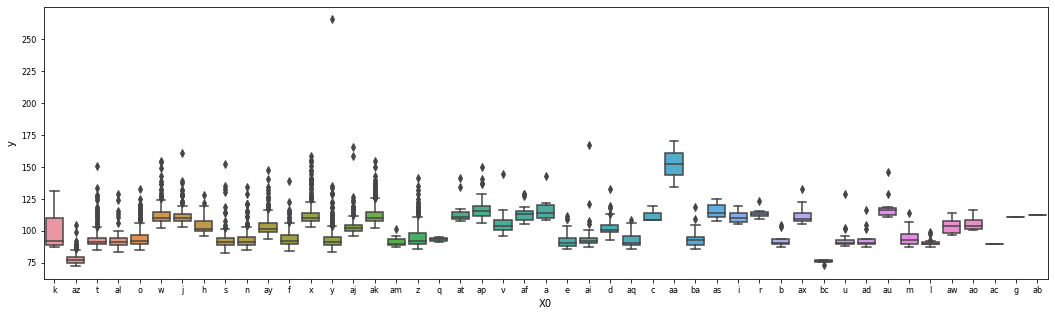

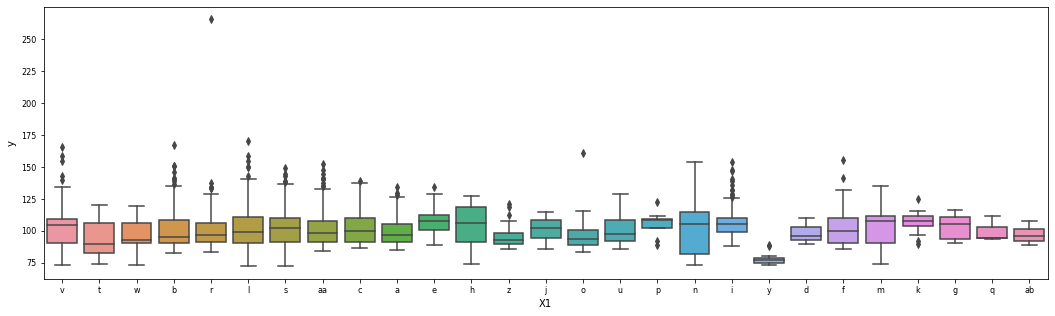

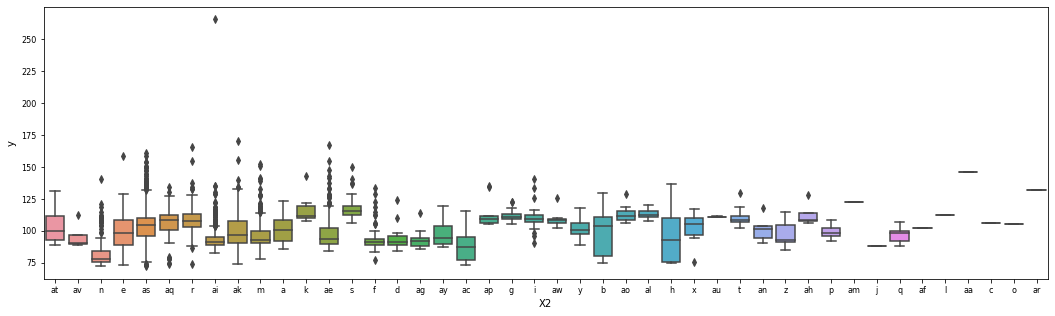

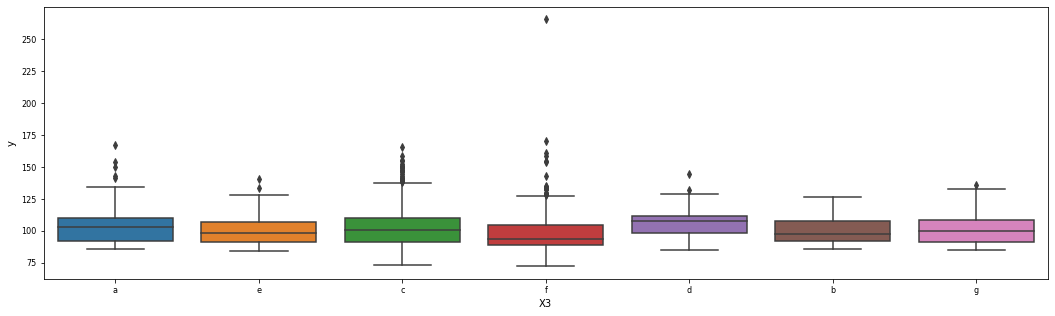

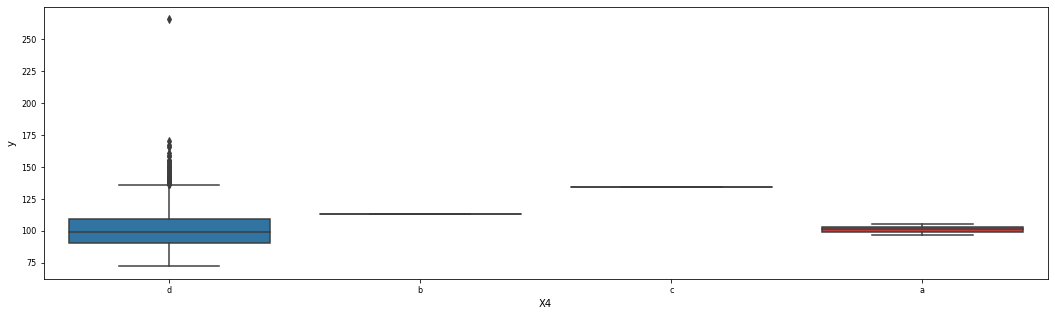

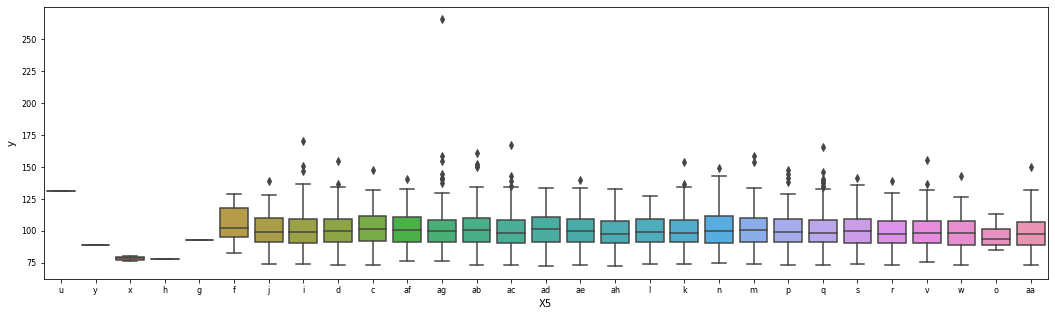

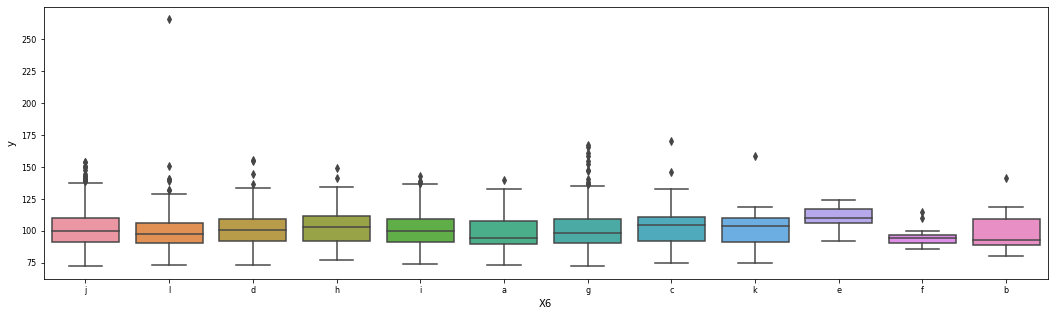

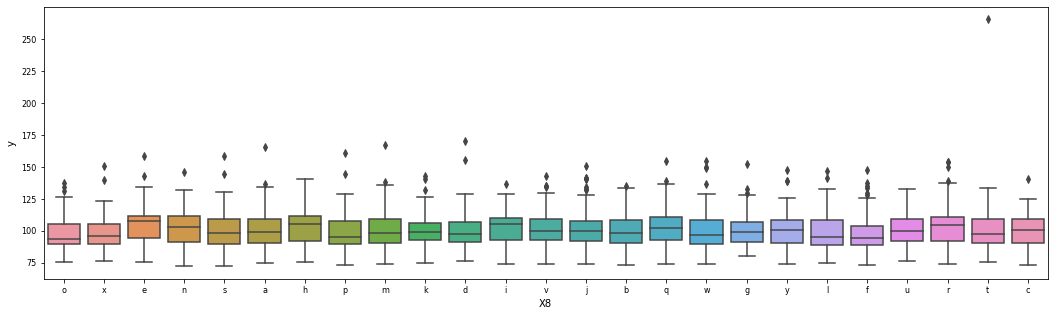

In [16]:
# value of y change for each of X0,X1 .....

cols=['X0','X1','X2','X3','X4','X5','X6','X8']


for col in cols:
    plt.figure(figsize=(18,5))
    sns.boxplot(x=col,y='y',data=df_train)
    plt.xlabel(col,fontsize=10)
    plt.ylabel('y',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

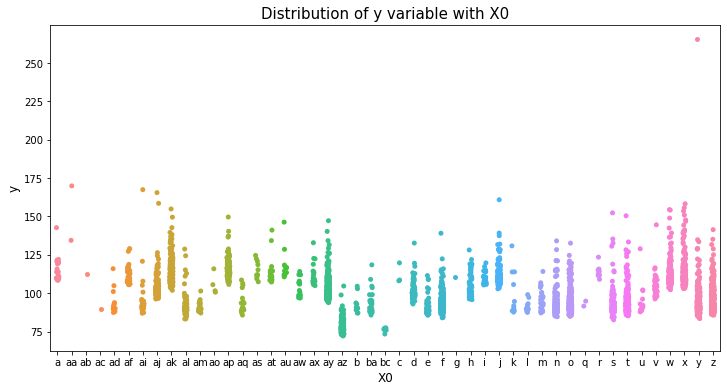

In [16]:
# Different graph plotting to explore the categorical columns present in the dataset.
var="X0"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()



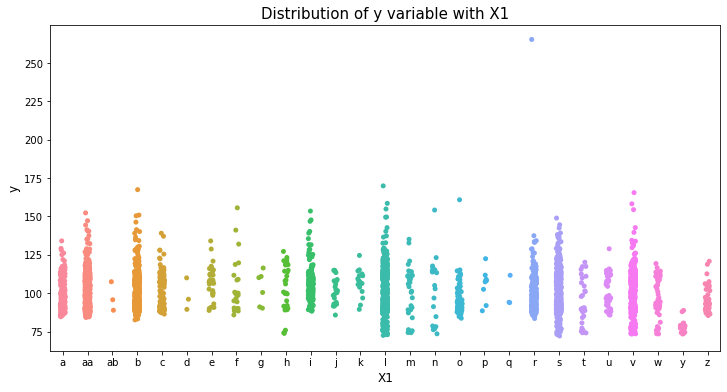

In [19]:
var="X1"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

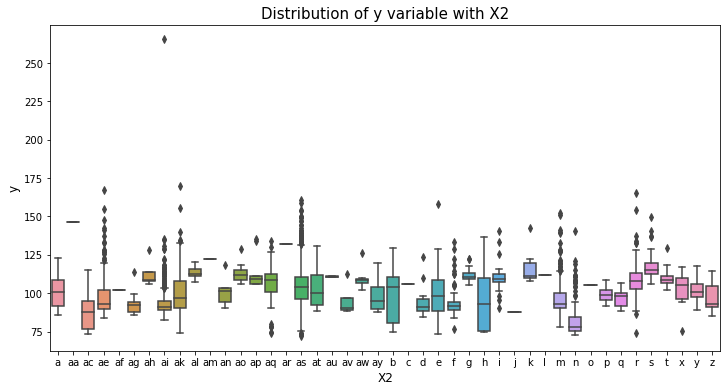

In [17]:
var="X2"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

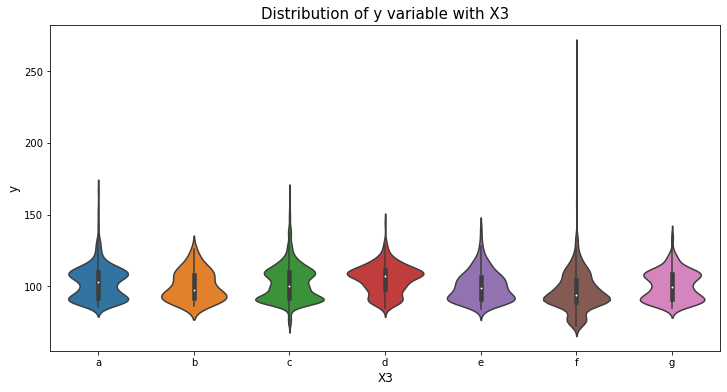

In [18]:
var="X3"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

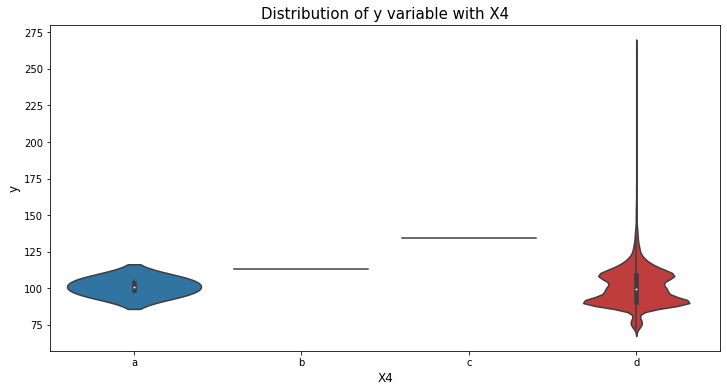

In [19]:
var="X4"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

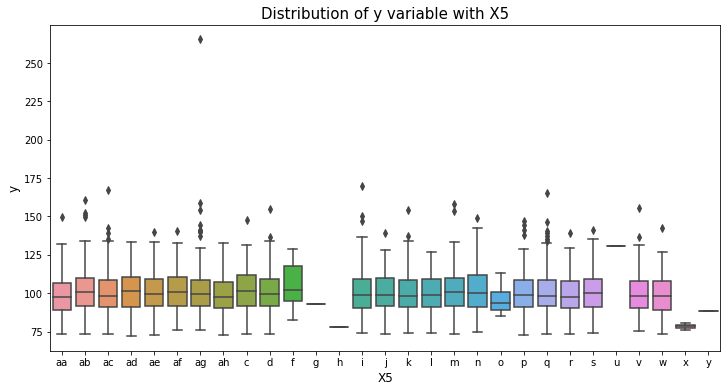

In [20]:
var="X5"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

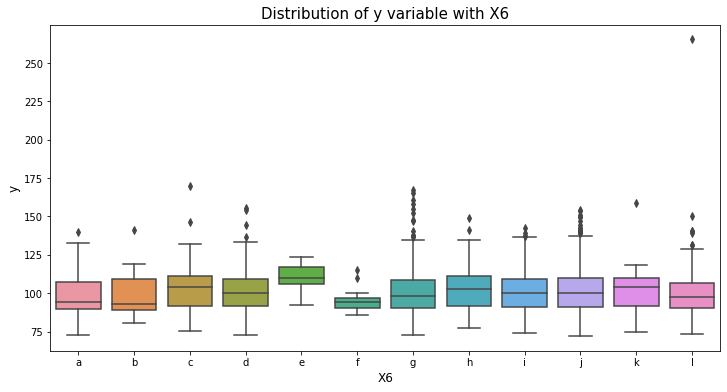

In [21]:
var="X6"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

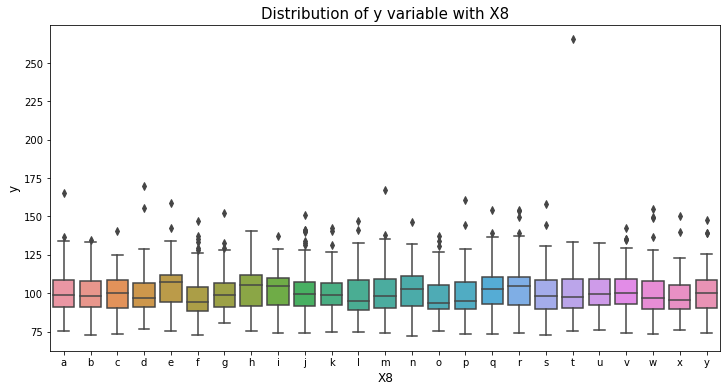

In [22]:
var="X8"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Observation: <BR/> Column X0, X1,X2,X3,X6,X8 look good for prediction of testing time as values are randomly distributed all over the place
Column X4 probably is not a good fature to predict testing time as values are almost same and not randomly distributed <BR/><BR/> Let us  perform hypothesis testing to further assess :</h5></left>


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Observation: <BR/>Use of hypothesis testing (ANOVA) <BR/> Check if the categorical variables (X0,X1,X2....X8) have strong relationship with the response variable (y) <BR/> A sample check of column say X4 <BR/> <BR/> H0: no difference of means across the means of the distinct values of X4</h5></left>

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('y ~ C(X4)',data=df_train).fit()
print('F-statistic: ', model.fvalue)
print('p-value: ', model.f_pvalue)

F-statistic:  2.6188965213725144
p-value:  0.04920919630464415


##### p-value pretty close to Significance level of 0.05, we will further analyze the X4 column, most likely X4 column can be dropped

In [18]:
anova_table= sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(X4),1261.638003,3.0,2.618897,0.049209
Residual,675244.676340,4205.0,NaN,NaN


### Interpretation:

#### The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments
#### The P-value obtained from ANOVA analysis is NOT significant (P close to 0.05), and therefore, we conclude that there are NO significant differences among treatments.
#### From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other.

#### To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.
#### H0 : the means are same in the group (pair)


In [19]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
colname='X4'

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df_train['y'], groups=df_train[colname],alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b     11.7  0.862 -28.1874 51.5874  False
     a      c    32.94 0.1461  -6.9474 72.8274  False
     a      d  -0.4417    0.9 -23.4762 22.5927  False
     b      c    21.24 0.6199  -24.818  67.298  False
     b      d -12.1417 0.7474 -44.7135 20.4301  False
     c      d -33.3817 0.0421 -65.9535 -0.8099   True
-----------------------------------------------------


### Interpretation
#### The H0 is the mean for a pair of groups (say a and b) are same
#### the reject column states False - means we cannot reject the null hypothesis
#### But for pair (c & d) we can reject the H0 --- mean of c and mean of d are different

In [20]:
df_train[df_train.X4=='c']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1308,2584,134.04,ak,e,ap,c,c,ac,j,j,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [21]:
df_train[df_train.X4=='d']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

#### We will not drop X4 column

In [22]:
df_train.X4.value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [23]:
# value of y change for each of X0,X1......
cols=['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cols:
    print(col, '\n',df_train[col].value_counts())

X0 
 z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64
X1 
 aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
X2 
 as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
a

#### Run ANOVA for all the categorical columns

In [24]:
colnames = ['X0','X1','X2','X3','X4','X5','X6','X8']

for colname in colnames:
    model=ols('y ~ '+ colname,data=df_train).fit()
    print('Column : {}, F-statistic : {:6.2f}, p-value : {:6.2f}'.format(colname,model.fvalue,model.f_pvalue))

Column : X0, F-statistic : 122.31, p-value :   0.00
Column : X1, F-statistic :   6.99, p-value :   0.00
Column : X2, F-statistic :  28.26, p-value :   0.00
Column : X3, F-statistic :  30.99, p-value :   0.00
Column : X4, F-statistic :   2.62, p-value :   0.05
Column : X5, F-statistic :   2.15, p-value :   0.00
Column : X6, F-statistic :   4.18, p-value :   0.00
Column : X8, F-statistic :   5.03, p-value :   0.00


<center><h1 style="font-size:170%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">    
ID variable:</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">    
One more important thing we need to look at it is ID variable. This will give an idea of how the splits are done across train and test (random or id based) and also to help see if ID has some potential prediction capability (probably not so useful for business)</h1></center>

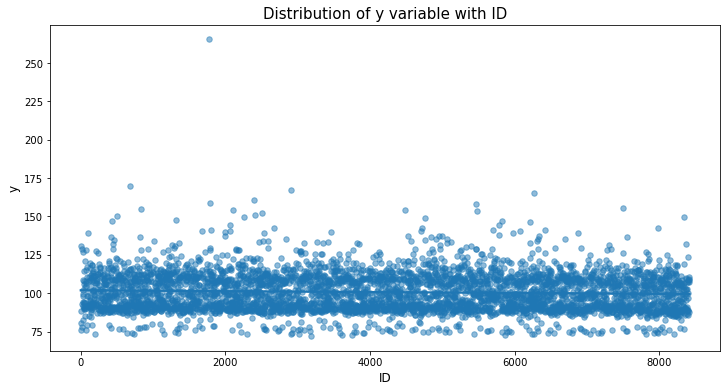

In [25]:
var = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var, y='y', data=df_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

In [26]:
df_train[df_train.columns[10:]].sample(10)

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2928,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2029,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3654,0,0,0,0,1,0,0,0,0,0,

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">The columns starting X10 onwards all contains binary data- this denotes presence/absence of a car feature</h5></left>

In [27]:
# Integer Columns Analysis
unique_value_dict = {}
for col in df_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

<center><h1 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.</h1></center>

<center><h1 style="font-size:160%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">Binary Variables:
</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">    
Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables.</h1></center>

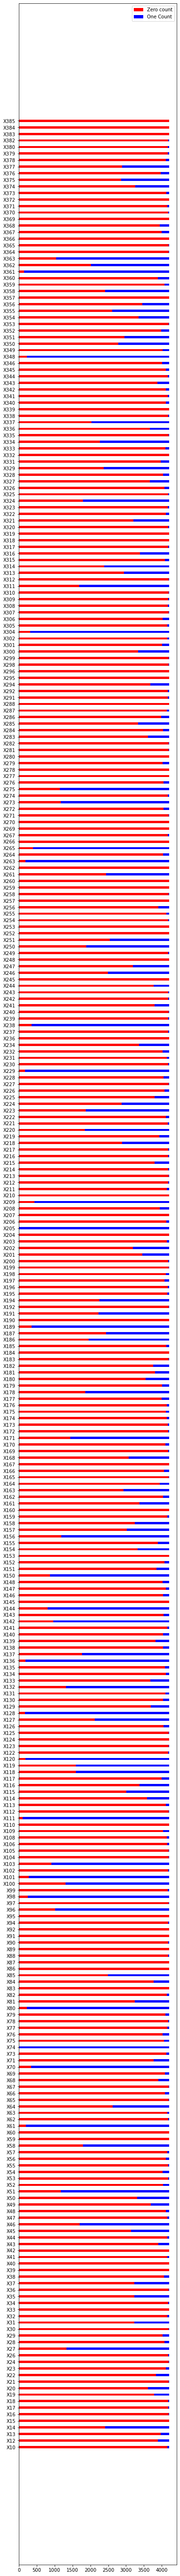

In [28]:
zero_list=[]
one_list=[]
col_list = unique_value_dict['[0, 1]']
for col in col_list:
    zero_list.append((df_train[col]==0).sum())
    one_list.append((df_train[col]==1).sum())
l = len(col_list)
arr = np.arange(l)
width = 0.35
plt.figure(figsize=(6,100))
plot_1 = plt.barh(arr, zero_list, width, color='red')
plot_2 = plt.barh(arr, one_list, width, left=zero_list, color="blue")
plt.yticks(arr, col_list)
plt.legend((plot_1[0], plot_2[0]), ('Zero count', 'One Count'))
plt.show()

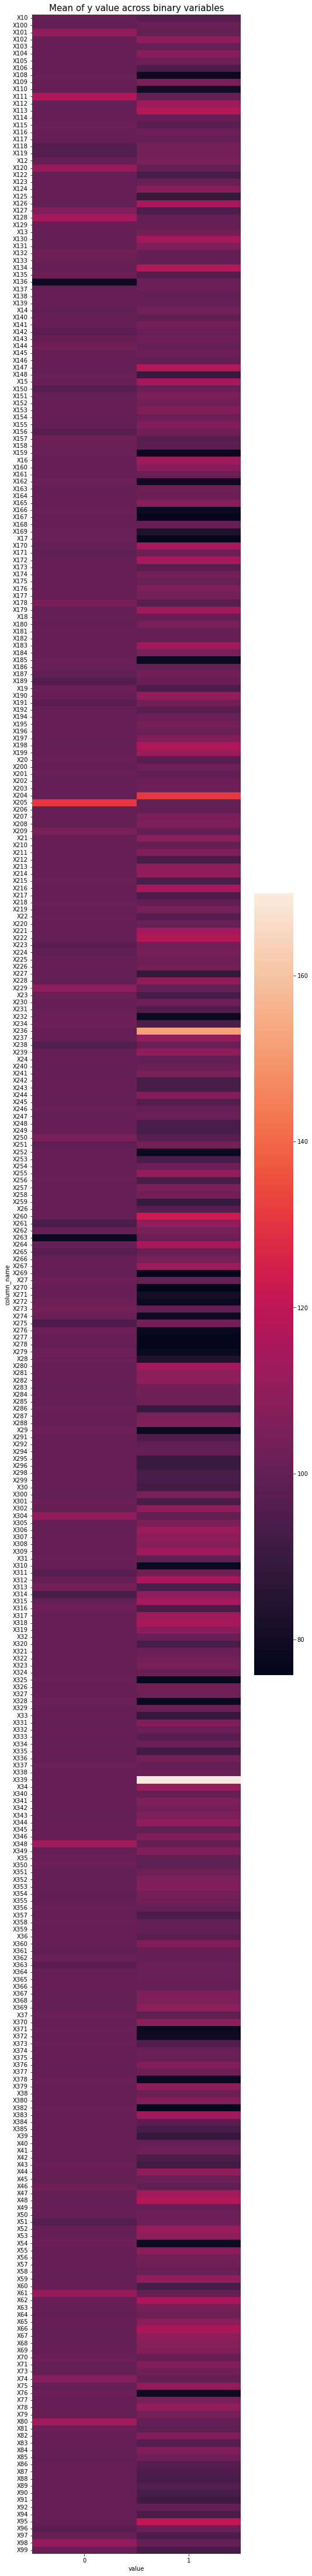

In [29]:
zero_mean_list = []
one_mean_list = []
cols_list = unique_value_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(df_train.loc[df_train[col]==0].y.mean())
    one_mean_list.append(df_train.loc[df_train[col]==1].y.mean())
new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

<left><h5 style="font-size:140%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">    
Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the count distribution is also good between both the classes (can be seen from the previous graph). We will dive more into the important variables in the later part.</h5></left>

In [30]:
# cardinality=1 columns: 12 columns in data
data_one_cardinality_columns = [column for column in df_train.columns if df_train[column].nunique()==1]
data_one_cardinality_columns

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">These 12 columns are having cardinality 1 i.e. these columns does not impact the values of Y, so could be dropped, but would consider doing this later</h5></left>

<center><h1 style="font-size:170%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">    
Target Variable:</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">    
"y" is the variable we need to predict. So let us do some analysis on this variable first. Histogram,normality test,outliers</h1></center>


In [31]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

<left><h1 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Observation:<BR/>
    * avergae time to test a car is about 100 seconds<BR/>
    * min test time and max test time range is of 190 secs<BR/>
    * there is outliers on the higher side<BR/>
    * the testing time seems to be non-gaussian distribution (possible outliers)
</h1></left>

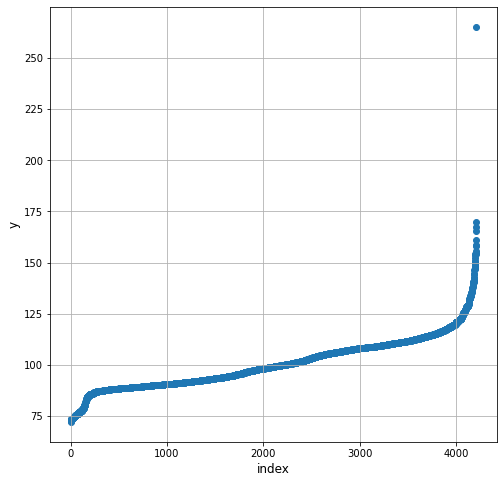

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(range(df_train.shape[0]),np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid()
plt.show()

<center><h1 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Seems like a single data point is well above the rest.Now let us plot the histogram graph.</h1></center>

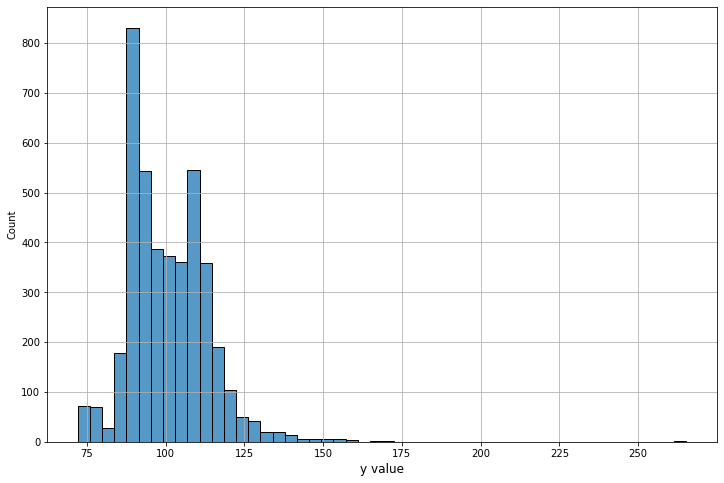

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df_train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.grid()
plt.show()

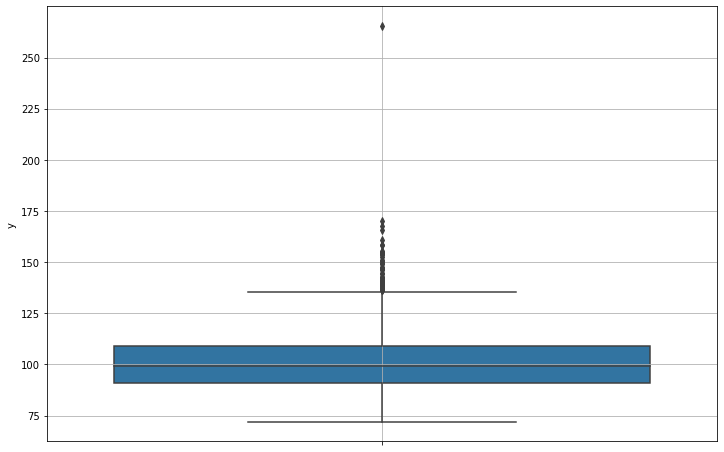

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df_train.y)
plt.grid()

<AxesSubplot:ylabel='y'>

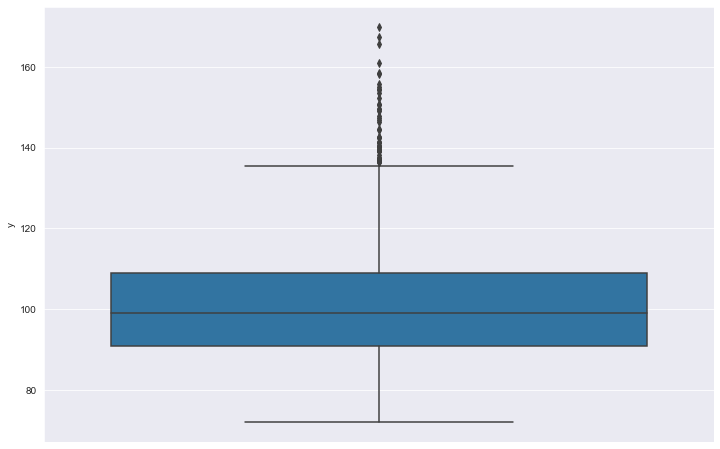

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_train_outlier = df_train[(df_train['y'] <= 200)]
sns.boxplot(y=df_train_outlier.y)

<left><h5 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Testing time is majorly between 90 and 110 seconds, outliers are there above 135 seconds, on the upper side, there is not much outlier on the lower side</h5></left>

<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">Let us do statistical data analysis</h5></left>

In [38]:
from statsmodels.graphics.gofplots import qqplot
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

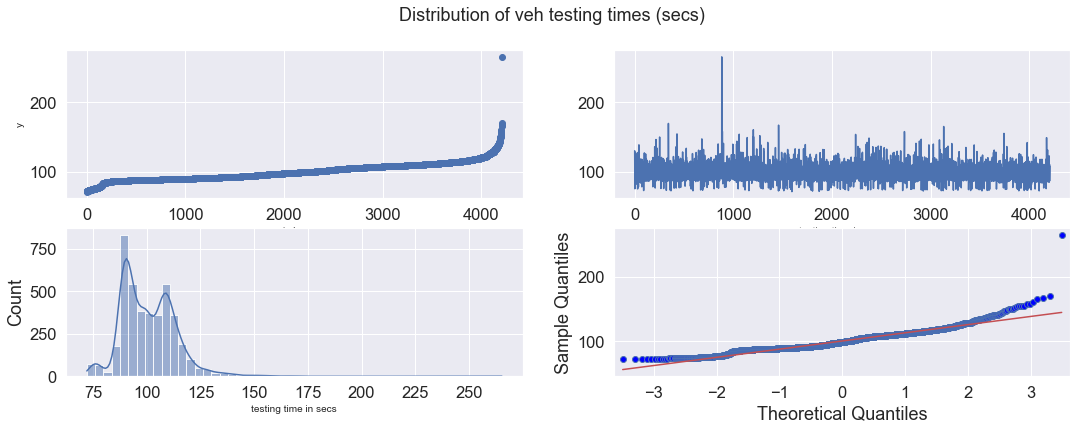

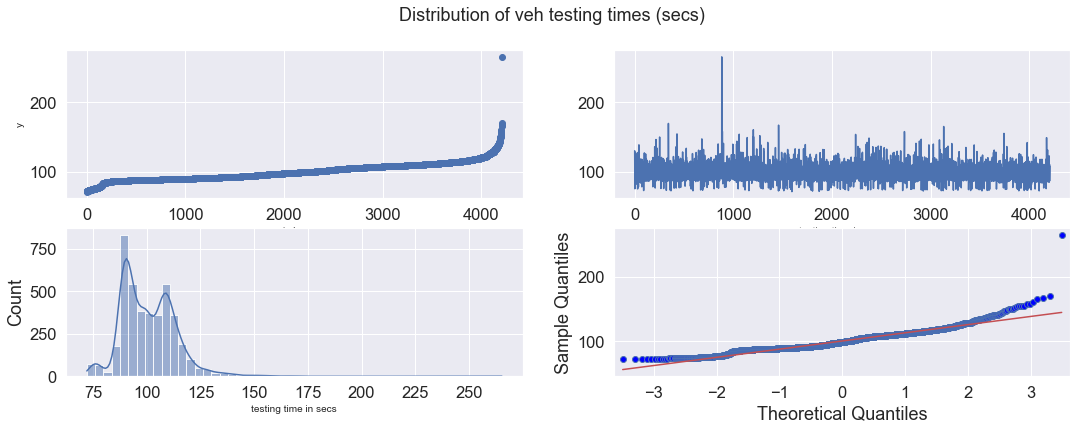

In [42]:
fig, ((ax1,ax2), (ax3,ax4))=plt.subplots(nrows=2, ncols=2, figsize=(18,6))

fig.suptitle('Distribution of veh testing times (secs)', fontsize=18)

ax1.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))
ax1.set_xlabel('index',fontsize=10)
ax1.set_ylabel('y',fontsize=10)


ax2.plot(df_train['y']);
ax2.set_xlabel('testing time in secs', fontsize=10)


sns.histplot(df_train.y.values,bins=50,kde=True,ax=ax3)
ax3.set_xlabel('testing time in secs',fontsize=10)


# q-q plot
qqplot(df_train['y'],line='s', ax=ax4) # to see whether the distribution of data follow normal distribution



<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">The conclusions from the above histograms on the merc-benz testing times are: <BR/>* The majority of test durations are between 90 and 100 seconds <BR/>* Peaks can be observed for test duration on 97-98 seconds and near  108 seconds<BR/>* The testing times are bi-modal,with 2 distinct peaks<BR/>* The data is positively skewed, with a long tail stretching into the upper values<BR/>* The scatter plot, line plot, qq plot all shows possibilities of a outlier and also the histogram plot is skewed to the right.<BR/>* Vehicle testing time do not seem to be normally distributed, which is not an issue for modelling<BR/>   </h5></left>

<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">Statistical Normality test on y <BR/> This tests assume that the sample was drawn from a Gaussian distribution.Technically this is called null hypothesis, or H0. A threshold level is chosen called alpha,typically 5%(or 0.05), that is used to interpret the p-value.<BR/> *H0 : Sample drawn from Gaussian distribution <BR/> * HA: sample not drawn from a Gaussian distribution</h5></left>

In [43]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">1. Shapiro-Wilk Test<BR/><BR/>The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution,named for Samuel Shapiro and Martin Wilk</h5></left>

In [44]:
# normality test
stat, p=shapiro(df_train['y'])
print('Statistics=%.3f,p=%.3f' % (stat,p))

# interpret
alpha=0.05
if p>alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.939,p=0.000
Sample does not look Gaussian (reject H0)


<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">2. D'Agistino's K ^2 Test<BR/><BR/>The D'Agistino's K^2 test calculates summary statistics from the data,namely kurtosis and skewness,to determine if the data distribution departs from the normal distribution,named for Ralph D'Agostino <BR/> Skew is a quantification of how much a distribution is pushed left or right, a meausre of asymmetry in the distribution. Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.<BR/>The D'Agostino's K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.</h5></left>

In [45]:
# normality test
stat,p=normaltest(df_train['y'])
print('Statistics=%.3f,p=%.3f' % (stat,p))
# interpret
alpha=0.05
if p>alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1302.013,p=0.000
Sample does not look Gaussian (reject H0)


<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">3. Anderson Test</h5></left>

In [46]:
# normality test
result= anderson(df_train['y'])
p=0
print('{:15s} {:15s} {:15s}'.format('Significance Level', 'Test Statistics', 'Critical Value'))

for i in range(len(result.critical_values)):
    sl,cv=result.significance_level[i],result.critical_values[i]
    
    if result.statistic < result.critical_values[i]:
        print( ' {:17d}% {:14.3f} {:16.3f} Test stats  < CV, (fail to reject H0)'.format(int(sl),result.statistic,cv))
    else:
        print(' {:17d}% {:14.3f} {:16.3f} Test stats  < CV, (reject H0)'.format(int(sl),result.statistic,cv))

Significance Level Test Statistics Critical Value 
                15%         43.248            0.575 Test stats  < CV, (reject H0)
                10%         43.248            0.655 Test stats  < CV, (reject H0)
                 5%         43.248            0.786 Test stats  < CV, (reject H0)
                 2%         43.248            0.917 Test stats  < CV, (reject H0)
                 1%         43.248            1.091 Test stats  < CV, (reject H0)


<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">Observation : <Br/> * The y is non-gaussian <BR/> * But we shall not worry about the y as yet, possibly as part of model refinement we can focus on the outliers</h5></left>

<left><h5 style="font-size:130%; font-family:arial; background:orange; color:black; border-radius:10px 10px; padding:10px;">Scaling Requirements : <Br/> * The values on predictor columns are all either binary or nominal values (none of them are float/numeric) so scaling is not needed</h5></left>

<left><h5 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Feature Engineering Methods : <BR/> <BR/> Method 1: check columns with 0 std dev <BR/> <BR/> These 0 std dev features are constant.Since these features don't vary, it will have no effect on the model performance</h5></left>

In [47]:
df_train.X0.dtypes

dtype('O')

In [48]:
%%time

cols_to_drop3_var0=[]

for each_col in df_train.drop(['y'],axis=1).columns:
    if df_train[each_col].dtypes !='O': # not an object col
        if df_train[each_col].std() == 0.00:
            stats= each_col + ' { ' \
                    ' std : ' + str(df_train[each_col].std()) + \
                    ' Min : ' + str(df_train[each_col].min()) + \
                    ' Max : ' + str(df_train[each_col].max()) + " } "
            print(stats)
            cols_to_drop3_var0.append(each_col)

print('Number of features with 0 std : {}'.format(len(cols_to_drop3_var0)))
            

X11 {  std : 0.0 Min : 0 Max : 0 } 
X93 {  std : 0.0 Min : 0 Max : 0 } 
X107 {  std : 0.0 Min : 0 Max : 0 } 
X233 {  std : 0.0 Min : 0 Max : 0 } 
X235 {  std : 0.0 Min : 0 Max : 0 } 
X268 {  std : 0.0 Min : 0 Max : 0 } 
X289 {  std : 0.0 Min : 0 Max : 0 } 
X290 {  std : 0.0 Min : 0 Max : 0 } 
X293 {  std : 0.0 Min : 0 Max : 0 } 
X297 {  std : 0.0 Min : 0 Max : 0 } 
X330 {  std : 0.0 Min : 0 Max : 0 } 
X347 {  std : 0.0 Min : 0 Max : 0 } 
Number of features with 0 std : 12
Wall time: 62 ms


In [49]:
df_train.X11.value_counts()[0]

4209

In [50]:
cols_to_drop3_var0

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

<left><h5 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Method 2: Calculate the no of features which has low variance. <BR/> This could be applied by using a threshold value using VarianceThreshold in the sklearn library <BR/> Let us get the columnwise variances(excluding the columns with 0 std dev)</h5></left>

In [51]:
%%time

features_var_dict=dict()
features_var_arr=[]
cols_to_drop3_var0_y=cols_to_drop3_var0+['y']

for each_col in df_train.drop(cols_to_drop3_var0,axis=1).columns:
    if df_train[each_col].dtypes !='O':   # not an object col
        features_var_dict[each_col]=df_train[each_col].var()
        
features_var_arr.append(features_var_dict)
df_features_var=pd.DataFrame(features_var_arr).T.reset_index()
df_features_var.columns=['feature_name','variance']

Wall time: 82 ms


In [52]:
df_features_var.head()

,feature_name,variance
0,ID,5.941936e+06
1,y,1.607667e+02
2,X10,1.313092e-02
3,X12,6.945713e-02
4,X13,5.462335e-02


In [53]:
df_features_var.describe()

,variance
count,3.580000e+02
mean,1.659810e+04
std,3.140411e+05
min,2.375861e-04
25%,5.024399e-03
50%,2.297302e-02
75%,9.287924e-02
max,5.941936e+06


In [54]:
from sklearn.feature_selection import VarianceThreshold
thresholds=np.linspace(start=df_features_var['variance'].min(),
                       stop=np.quantile(df_features_var['variance'],.25),
                       num=10)
thresholds

array([0.00023759, 0.00076945, 0.00130132, 0.00183319, 0.00236506,
       0.00289693, 0.00342879, 0.00396066, 0.00449253, 0.0050244 ])

In [55]:
list(df_train_cat.columns)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [56]:
%%time

# Add the class column as we do not want to calculate the variance on this column
cols_to_drop3_var0_y = cols_to_drop3_var0 + ['y'] + list(df_train_cat.columns)

# get total number of features in the dataset

total_nbr_of_features = len(df_train.drop(cols_to_drop3_var0_y,axis=1).columns)

for threshold in thresholds:
    sel= VarianceThreshold(threshold=threshold)
    sel.fit(df_train.drop(cols_to_drop3_var0_y,axis=1))
    
    # corresponding feature is selcted for retention
    mask=sel.get_support()
    
    nbr_of_features_retain = np.count_nonzero(mask)
    per_features_to_drop = ((total_nbr_of_features - nbr_of_features_retain)/total_nbr_of_features)*100
    
    print('threshold = {:6.4f}, nbr of columns to retain = {}, % columns to drop = {:6.2f}, nbr of columns to drop = {}'.format(threshold,nbr_of_features_retain,per_features_to_drop, (total_nbr_of_features-nbr_of_features_retain)))


threshold = 0.0002, nbr of columns to retain = 339, % columns to drop =   5.04, nbr of columns to drop = 18
threshold = 0.0008, nbr of columns to retain = 321, % columns to drop =  10.08, nbr of columns to drop = 36
threshold = 0.0013, nbr of columns to retain = 313, % columns to drop =  12.32, nbr of columns to drop = 44
threshold = 0.0018, nbr of columns to retain = 301, % columns to drop =  15.69, nbr of columns to drop = 56
threshold = 0.0024, nbr of columns to retain = 293, % columns to drop =  17.93, nbr of columns to drop = 64
threshold = 0.0029, nbr of columns to retain = 280, % columns to drop =  21.57, nbr of columns to drop = 77
threshold = 0.0034, nbr of columns to retain = 278, % columns to drop =  22.13, nbr of columns to drop = 79
threshold = 0.0040, nbr of columns to retain = 277, % columns to drop =  22.41, nbr of columns to drop = 80
threshold = 0.0045, nbr of columns to retain = 273, % columns to drop =  23.53, nbr of columns to drop = 84
threshold = 0.0050, nbr of c

<B>Next step is to decide variance threshold
Start with a conservative value (low value)
based on above result,we can choose variance threshold=0.005</B>

In [59]:
%%time
# Add the class column as we do not want to calculate the variance on this column
cols_to_drop3_var0_y = cols_to_drop3_var0 + ['y'] + list(df_train_cat.columns)
# get total number of features in the dataset
total_nbr_of_features = len(df_train.drop(cols_to_drop3_var0_y,axis=1).columns)
sel= VarianceThreshold(threshold=0.005)
sel.fit(df_train.drop(cols_to_drop3_var0_y,axis=1))
 
# corresponding feature is selcted for retention
mask=sel.get_support()
 
nbr_of_features_retain = np.count_nonzero(mask)
nbr_of_features_drop = total_nbr_of_features - nbr_of_features_retain
 
print('number of columns to drop = {}'.format(nbr_of_features_drop))
all_feature_names= np.array(df_train.drop(cols_to_drop3_var0_y,axis=1).columns)
cols_to_drop4_var_thresh=all_feature_names[~mask]
len(cols_to_drop4_var_thresh)


number of columns to drop = 90
Wall time: 74 ms


90

In [60]:
%%time

# Add the class column as we do not want to calculate the variance on this column
cols_to_drop3_var0_y = cols_to_drop3_var0 + ['y'] + list(df_train_cat.columns)

# get total number of features in the dataset

total_nbr_of_features = len(df_train.drop(cols_to_drop3_var0_y,axis=1).columns)
sel= VarianceThreshold(threshold=0.0013)
sel.fit(df_train.drop(cols_to_drop3_var0_y,axis=1))
    
# corresponding feature is selcted for retention
mask=sel.get_support()
    
nbr_of_features_retain = np.count_nonzero(mask)
nbr_of_features_drop = total_nbr_of_features - nbr_of_features_retain
    
print('number of columns to drop = {}'.format(nbr_of_features_drop))
all_feature_names= np.array(df_train.drop(cols_to_drop3_var0_y,axis=1).columns)

cols_to_drop4_var_thresh=all_feature_names[~mask]
len(cols_to_drop4_var_thresh)

number of columns to drop = 44
Wall time: 78 ms


44

<left><h5 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Method 3: Remove the features which have a high correlation. <BR/> Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)</h5></left>

### Problems due to multicollinearity
#### 1. Redundancy: two predictors might be providing the same information about the response variable thereby leading to unreliable coefficients of the predictors  (specially for linear models)
#### 2. The estimate of a predictor on the response variable will tend to be less precise and less reliable
#### 3. An important predictor can become unimportant as that feature has a collinear relationship with other predictors
#### 4. The standard erros of the coefficients of the affected predictors tend to be large.In that case, we fail to reject the null hypothesis of the linear regression that the coefficeint is equal to zero.This leads to a "Type || error" as we are forced to believe that there is not significant impact of a predictor on the response variable when essentially there is a significant impact.
#### 5. Overfitting - The best models are those in which each predictor variable has a unique impact on the response variable. When there are redundant or correlated predictors in the model that explains the response variable,the model tends to overfit. That means, the models do well on the train data but do a poor job on the test data thus defeating the whole purpose of model building

### Algorithms which do not get affected by multi-collinearity
<ul>
<li>Decision Trees</li>
<li>Random Forest</li>
<li>Boosted Trees</li>
</ul>

### Algorithms which get affected by multi-collinearity
<ul>
<li>Logistic Regression</li>
<li>Support Vector Machine</li>
<li>Neural Nets</li>
</ul>




#### Correlation Coefficients

<ul>
<li>Pearson's ... developed by Karl Pearson over 120 years</li>
<li>Spearman</li>
<li>Kendall Tau</li>
</ul>


#### Student t-Tests Comparing Two Groups

<ul>
<li>ANOVA</li>
<li>ANOVA-1 way</li>
<li>ANOVA-2 way</li>
<li>ANOVA-N way</li>
</ul>

#### Chi-Square tests

##### Since the features are all categorical, we shall try Kendall Tau correlation

In [61]:
%%time

# Add the class column as we do not want to calculate the variance on this column
cols_to_drop3_var0_y = cols_to_drop3_var0 + ['y'] + list(df_train_cat.columns)

corr=df_train.drop(cols_to_drop3_var0_y,axis=1).corr(method='kendall')

Wall time: 59.4 s


In [62]:
%%time

# create a True/False mask and apply it
mask_true_upper= np.triu(np.ones_like(corr,dtype=bool))


corr_upper_df=corr.mask(mask_true_upper)

# minimum and maximum value of corr in DataFrame
np.nanmin(corr_upper_df.min().values),np.nanmax(corr_upper_df.max().values)

Wall time: 29 ms


(-1.0, 1.0)

In [63]:
%%time
corr_threshold=0.7

# list column names of highly correlated features (r>0.5)
cols_to_drop4_corr=[each_col for each_col in corr_upper_df.columns if any (corr_upper_df[each_col]> corr_threshold)]

Wall time: 143 ms


In [64]:
len(cols_to_drop4_corr)

146

In [65]:
print(cols_to_drop4_corr)

['X14', 'X15', 'X17', 'X19', 'X21', 'X28', 'X29', 'X31', 'X32', 'X33', 'X35', 'X44', 'X45', 'X47', 'X48', 'X49', 'X50', 'X52', 'X53', 'X54', 'X57', 'X58', 'X60', 'X61', 'X62', 'X63', 'X66', 'X67', 'X69', 'X71', 'X75', 'X76', 'X78', 'X80', 'X84', 'X85', 'X87', 'X88', 'X89', 'X90', 'X94', 'X96', 'X98', 'X99', 'X100', 'X101', 'X102', 'X108', 'X111', 'X112', 'X113', 'X116', 'X117', 'X118', 'X119', 'X122', 'X125', 'X126', 'X128', 'X130', 'X133', 'X134', 'X136', 'X137', 'X138', 'X140', 'X146', 'X147', 'X150', 'X152', 'X154', 'X155', 'X159', 'X161', 'X162', 'X166', 'X167', 'X170', 'X172', 'X174', 'X178', 'X179', 'X183', 'X184', 'X185', 'X186', 'X187', 'X189', 'X191', 'X194', 'X197', 'X198', 'X202', 'X208', 'X214', 'X216', 'X217', 'X219', 'X222', 'X223', 'X224', 'X226', 'X230', 'X232', 'X236', 'X237', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243', 'X245', 'X246', 'X247', 'X248', 'X249', 'X253', 'X261', 'X262', 'X264', 'X265', 'X272', 'X275', 'X276', 'X279', 'X282', 'X283', 'X285', 'X295', 'X2

<left><h5 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Outlier detection/Removal <BR/> We need not do outlier detection on predictor columns as most of the values are 0,1, looks like there is outlier in y <BR/> We will use IQR method to detect outlier</h5></left>

In [66]:
# Calculate Q1 (25th percentile of data) for the given feature
Q1=np.percentile(df_train.loc[:,'y'],25)

# Calculate Q2 (50th percentile of data) for the given feature
Q2=np.percentile(df_train.loc[:,'y'],50)

# Calculate Q3 (75th percentile of data) for the given feature
Q3=np.percentile(df_train.loc[:,'y'],75)

# Use interquartile range to calculate an outlier step(1.5 times the interquartile range)

step=(Q3-Q1) *1.5


print('Q1 = {}, Q2= {}, Q3= {}, outlier step value = {}'.format(Q1,Q2,Q3,step))

Q1 = 90.82, Q2= 99.15, Q3= 109.01, outlier step value = 27.285000000000018


In [67]:
outlier_lower_idx=df_train[df_train['y'] <= (Q1-step)].index
outlier_upper_idx=df_train[df_train['y'] > (Q3+step)].index
no_lower_outliers=len(outlier_lower_idx)
no_upper_outliers=len(outlier_upper_idx)

print('Number of outliers in the lower extreme side = {}'.format(no_lower_outliers))
print('Number of outliers in the upper extreme side = {}'.format(no_upper_outliers))

print('Lower Outliers = {}%'.format(no_lower_outliers/df_train.shape[0] * 100))
print('Upper Outliers = {}%'.format(no_upper_outliers/df_train.shape[0] * 100))


Number of outliers in the lower extreme side = 0
Number of outliers in the upper extreme side = 50
Lower Outliers = 0.0%
Upper Outliers = 1.1879306248515087%


In [68]:
df_train.iloc[outlier_upper_idx]['y'].sort_values(ascending=False)

883     265.32
342     169.91
1459    167.45
3133    165.52
1203    160.87
889     158.53
2735    158.23
3744    155.62
429     154.87
1060    154.43
2240    154.16
2736    153.51
1269    152.32
1205    150.89
253     150.43
1141    149.63
4176    149.52
2376    148.94
681     147.72
2905    147.22
216     146.83
3090    146.30
2887    144.56
1036    144.36
1349    142.71
2357    142.71
3980    142.46
2852    141.39
900     141.31
3215    141.09
846     140.49
1033    140.41
3028    140.31
2348    140.25
995     140.15
1730    139.61
43      139.20
2983    139.16
1279    139.08
3442    139.07
2888    138.19
2470    137.49
998     137.44
3177    137.32
2496    137.09
2263    136.96
3773    136.75
2414    136.56
420     136.47
203     136.41
Name: y, dtype: float64

<AxesSubplot:xlabel='y', ylabel='Density'>

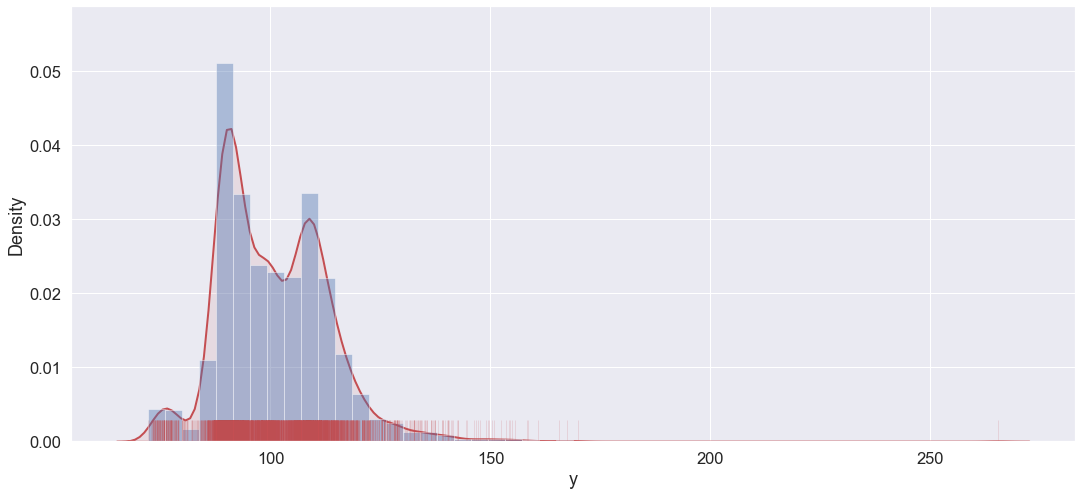

In [69]:
plt.figure(figsize=(18,8))

sns.distplot(df_train.y,
            kde=True,
            rug=True,
            rug_kws={"color":"r", "lw":1, "height":0.05,"alpha":0.15},
            kde_kws={"color":"r", "lw":2, "label": "KDE","alpha":0.1,"shade":True})

#### How do we handle outliers?
##### Simply remove rows, but this needs careful thinking
##### Stats measure

##### 1. Square Root Transformation

<AxesSubplot:xlabel='y', ylabel='Density'>

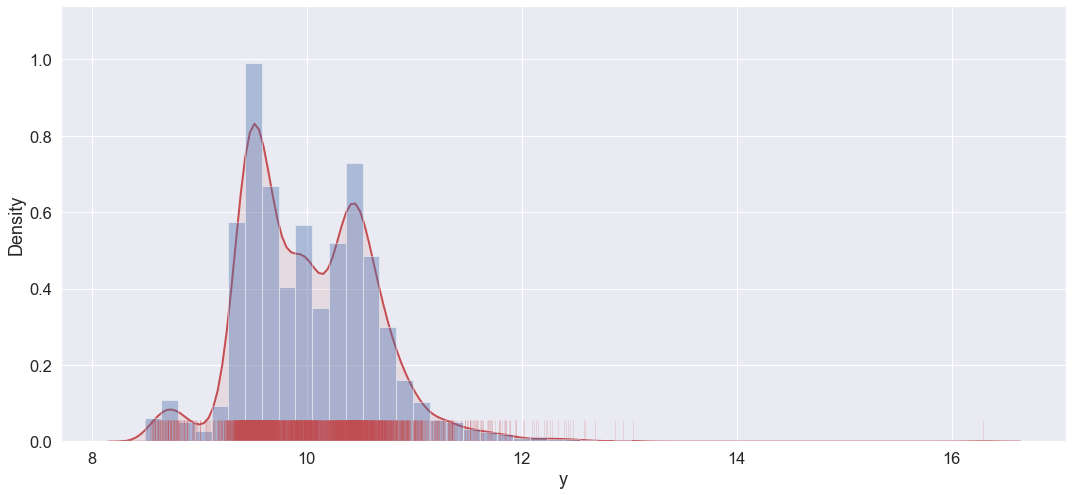

In [70]:
plt.figure(figsize=(18,8))
sns.distplot(np.sqrt(df_train.y),
             kde=True,
            rug=True,
            rug_kws={"color":"r", "lw":1, "height":0.05,"alpha":0.15},
            kde_kws={"color":"r", "lw":2, "label": "KDE","alpha":0.1,"shade":True})    

##### 2. Reciprocal Transformation

<AxesSubplot:xlabel='y', ylabel='Density'>

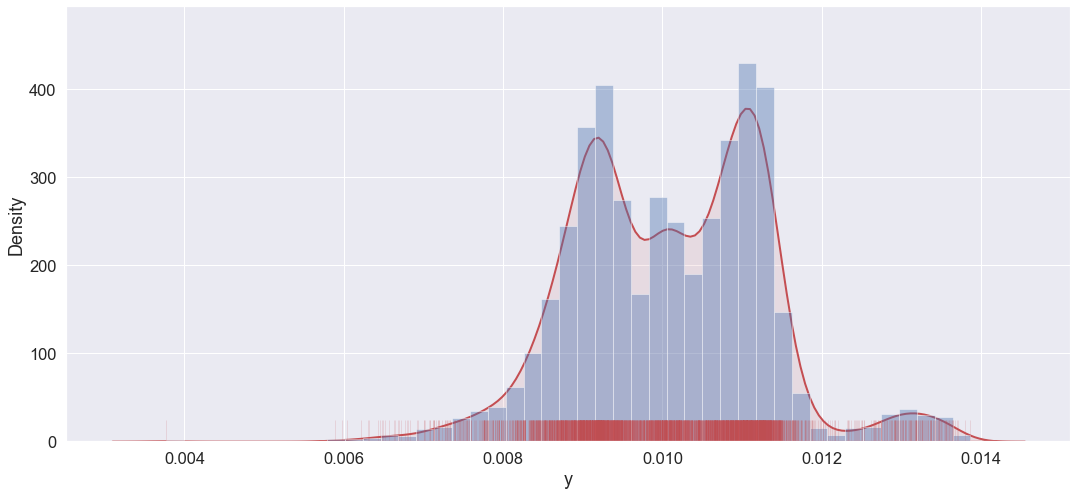

In [71]:
plt.figure(figsize=(18,8))
sns.distplot(1/df_train.y,
             kde=True,
            rug=True,
            rug_kws={"color":"r", "lw":1, "height":0.05,"alpha":0.15},
            kde_kws={"color":"r", "lw":2, "label": "KDE","alpha":0.1,"shade":True})  

##### 3. Log Transformation

<AxesSubplot:xlabel='y', ylabel='Density'>

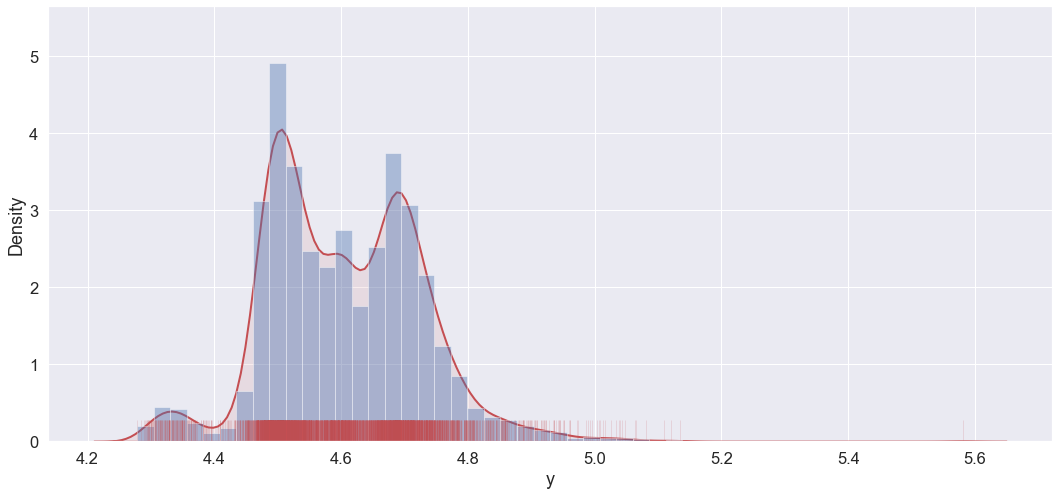

In [72]:
plt.figure(figsize=(18,8))
sns.distplot(np.log(df_train.y),
             kde=True,
            rug=True,
            rug_kws={"color":"r", "lw":1, "height":0.05,"alpha":0.15},
            kde_kws={"color":"r", "lw":2, "label": "KDE","alpha":0.1,"shade":True})  

##### Observation: We shall continue with the raw data in the column y

In [80]:
cols_to_drop_list=[cols_to_drop3_var0,
                   cols_to_drop4_var_thresh]

cols_to_drop_list_union = set().union(*cols_to_drop_list)
len(cols_to_drop_list_union)

56

#### Drop the unimportant columns

In [81]:
data_dropped=df_train.drop(['ID'],axis=1)

<left><h5 style="font-size:130%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">Categorical to Numeric Conversion<BR/>  Method 1: One Hot Encoding <BR/> Method 2: Label encoding<BR/><BR/><BR/> One hot Encoding</h5></left>

In [82]:
data_dropped_encoded=pd.get_dummies(data_dropped,drop_first=True)
data_dropped_encoded.shape

(4209, 556)

In [70]:
data_dropped_encoded.sample(5)

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_aa,X2_ac,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_b,X4_c,X4_d,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
3277,74.27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2163,91.71,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
X0_encoder= LabelEncoder()
X1_encoder= LabelEncoder()
X2_encoder= LabelEncoder()
X3_encoder= LabelEncoder()
X4_encoder= LabelEncoder()
X5_encoder= LabelEncoder()
X6_encoder= LabelEncoder()
X8_encoder= LabelEncoder()


X0_encoder.fit(data_dropped['X0'])
X1_encoder.fit(data_dropped['X1'])
X2_encoder.fit(data_dropped['X2'])
X3_encoder.fit(data_dropped['X3'])
X4_encoder.fit(data_dropped['X4'])
X5_encoder.fit(data_dropped['X5'])
X6_encoder.fit(data_dropped['X6'])
X8_encoder.fit(data_dropped['X8'])

LabelEncoder()

In [85]:
X0_encoder.classes_,X1_encoder.classes_

(array(['a', 'aa', 'ab', 'ac', 'ad', 'af', 'ai', 'aj', 'ak', 'al', 'am',
        'ao', 'ap', 'aq', 'as', 'at', 'au', 'aw', 'ax', 'ay', 'az', 'b',
        'ba', 'bc', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
       dtype=object),
 array(['a', 'aa', 'ab', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
        'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y',
        'z'], dtype=object))

In [86]:
data_dropped['X0'] = X0_encoder.transform(data_dropped['X0'])
data_dropped['X1'] = X1_encoder.transform(data_dropped['X1'])
data_dropped['X2'] = X2_encoder.transform(data_dropped['X2'])
data_dropped['X3'] = X3_encoder.transform(data_dropped['X3'])
data_dropped['X4'] = X4_encoder.transform(data_dropped['X4'])
data_dropped['X5'] = X5_encoder.transform(data_dropped['X5'])
data_dropped['X6'] = X6_encoder.transform(data_dropped['X6'])
data_dropped['X8'] = X8_encoder.transform(data_dropped['X8'])


<center><h1 style="font-size:170%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">    
Important Variables:

</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">    
Now let us run and xgboost model to get the important variables.

</h1></center>

[22:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




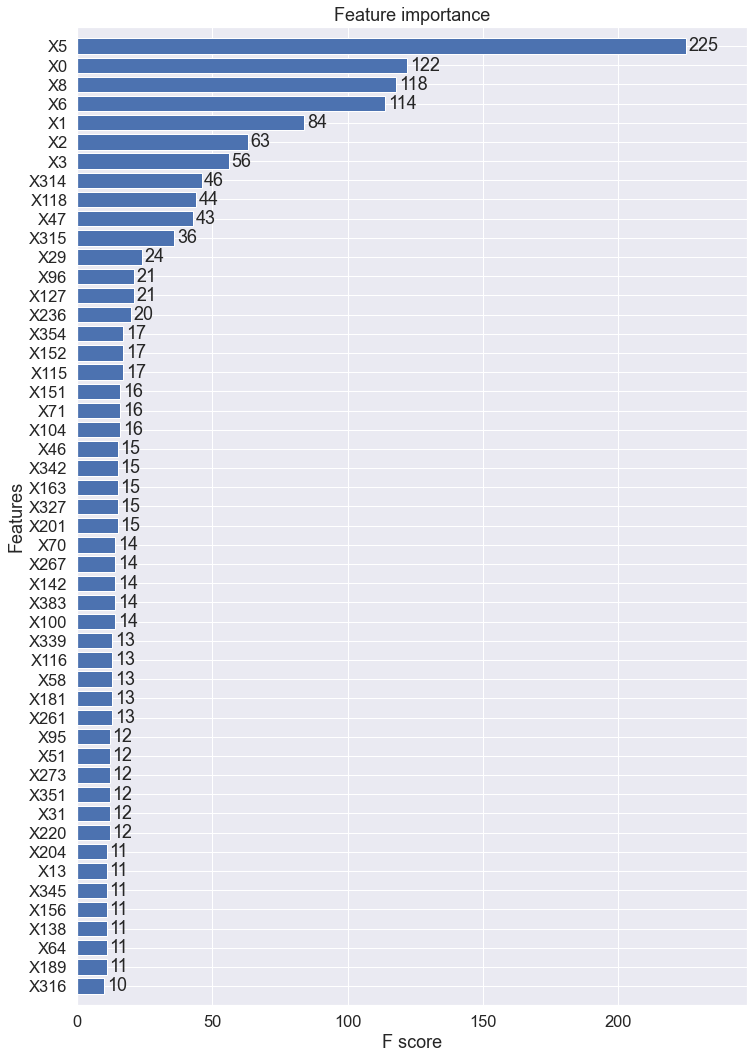

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[f].values)) 
        df_train[f] = lbl.transform(list(df_train[f].values))
        
train_y = df_train['y'].values
train_X =df_train.drop(["ID", "y"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">    
Let us also build a Random Forest model and check the important variables.

</h1></center>

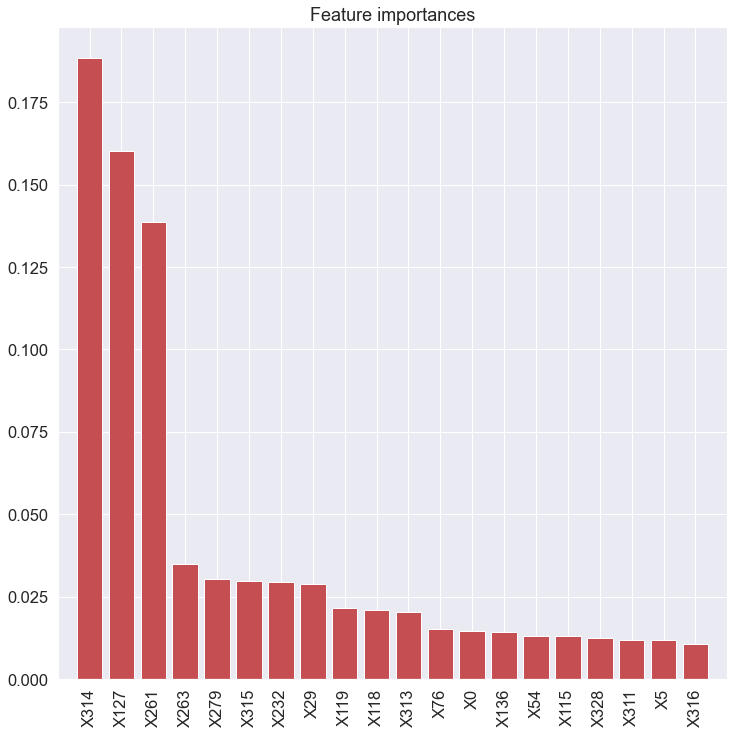

In [88]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;">    
Run Algorithm/Estimators:

</h1></center>

#### Separate features and target column

In [89]:
X= data_dropped_encoded.drop(['y'],axis=1)
y= data_dropped_encoded.y

In [90]:
X.head(5)

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_aa,X2_ac,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_b,X4_c,X4_d,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,

##### Train Test Split

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)
X_train.shape,X_test.shape

((3367, 555), (842, 555))

In [92]:
X_train.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_aa,X2_ac,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_b,X4_c,X4_d,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
3310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3334,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,

##### Function to print the test metrics

In [93]:
def model_metrics(y_true,y_hypothesis, test='test data'):
    print("Metrics using {} ...".format(test))
    print('Mean Abs Error MAE :       ',mean_absolute_error(y_true,y_hypothesis))
    print('Mean Sq Error MSE :        ',mean_squared_error(y_true,y_hypothesis))
    print('Root Mean Sq Error RMSE :  ',np.sqrt(mean_absolute_error(y_true,y_hypothesis)))
    print('MAPE :                     ',np.mean(np.abs((y_true-y_pred)/y_true))*100)
    print('MPE :                      ',np.mean((y_true-y_pred)/y_true)*100)
    print('r2 value :                 ',r2_score(y_true,y_hypothesis))
    
    print('\n')

##### Evaluate baseline MSE

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
mean_train = y_train.mean()

In [96]:
# Get prediction on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

In [97]:
# compute MAE and MSE
mae_baseline= mean_absolute_error(y_test,baseline_predictions)
mse_baseline = mean_squared_error(y_test,baseline_predictions)
print('Baseline MAE is {:.2f}'.format(mae_baseline))
print('Baseline MSE is {:.2f}'.format(mse_baseline))

Baseline MAE is 10.33
Baseline MSE is 163.40


##### In order to get an idea of the range MAE we would like to achieve here, we built the baseline model.
##### The prediction on average is off by 11.31 seconds from the actual testing time

<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 1. Perform Linear Regression</h1></center>

In [108]:
# import the ML algorithm
from sklearn.linear_model import LinearRegression
#instantiate the lin reg model
linreg=LinearRegression()
#fit the data
linreg.fit(X_train,y_train)

LinearRegression()

In [109]:
# predict (training samples)
y_pred=linreg.predict(X_train)
model_metrics(y_train,y_pred,'Training Data')

# predict (testing samples)
y_pred=linreg.predict(X_test)
model_metrics(y_test,y_pred,'Test Data')

Metrics using Training Data ...
Mean Abs Error MAE :        5.0173559548559545
Mean Sq Error MSE :         60.40408903790466
Root Mean Sq Error RMSE :   2.239945524975095
MAPE :                      4.789915223891733
MPE :                       -0.48936465909289295
r2 value :                  0.6226240314851185


Metrics using Test Data ...
Mean Abs Error MAE :        454941397626.1443
Mean Sq Error MSE :         3.243149051501867e+25
Root Mean Sq Error RMSE :   674493.4377932408
MAPE :                      484566911385.54535
MPE :                       -394324656521.7725
r2 value :                  -1.9853659612383845e+23




##### Check overfitting using cross validate

In [110]:
# import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [111]:
kf= KFold(n_splits=10,shuffle=True,random_state=20)

In [112]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

# instantiate the lin reg model
linreg = LinearRegression()

scores= cross_validate(estimator=linreg,
                       X=X_train,
                       y=y_train,
                       cv=kf,
                       scoring=scoring,
                       return_train_score=True)

print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))
print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['test_MSE'].mean()))


Score keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : 0.6280706347499048
Testing r2 : -1.4413417339644695e+23
Training MSE : -59.574212830387395
Testing MSE : -2.4715749417253695e+25
Wall time: 3.7 s


#### Linear Regression shows overfitting, Reasons could be
<ul>
<li> High dimensionality</li>
<li> Multi collinearity</li>
</ul>

<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 2. Try Regularization (L1,L2 - Lasso/Ridge or Elastic Net)</h1></center>

##### Check for multi-collinearity using statsmodel
<B>Condition number</B>
<ul>
<li>One way to assess multicollinearity is to compute the condition number</li>
<li>values over 20 are worrisome</li>
<li>condition number = square root of the ratio of the biggest to the smallest eigen values</li>
</ul>


In [167]:
np.set_printoptions(suppress=True,precision=2)
import statsmodels.api as sm

X_1=sm.add_constant(X)
ols_model=sm.OLS(y,X_1)
ols_results=ols_model.fit()
#print(ols_results.summary())

In [168]:
np.linalg.cond(ols_results.model.exog)

3.4577565669669323e+19

##### Check the <blockquote>multi-collinearity using Eigensystem analysis of Correlation Matrix </blockquote>
<ul>
    <li> The eigen values can be used to measure the presence of multicollinearity</li>
    <li> if multicollinearity is present in the predictor variables, one or more of the eigenvalues will be small(near to zero)</li>
</ul>

In [169]:
from numpy.linalg import inv
import scipy
import scipy.linalg as la

In [170]:
def multicoll_eigen(df_selected_cols,y):
    X = df_selected_cols.values
    
    # get the corr
    # np.corrcoef(X,rawvar=False)
    
    # check the multi collinearity
    corr = np.corrcoef(X,rowvar=True)
    #print(corr)
    eigvals,eigvecs = la.eig(corr)
    eivals = eigvals.real
    
    print(eigvals)
    
    

In [171]:
df_selected_cols = X
multicoll_eigen(df_selected_cols, y)

[2179.44+0.j  229.42+0.j  162.45+0.j ...   -0.  +0.j   -0.  -0.j
   -0.  +0.j]


<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 2.1 Ridge Regression</h1></center>

##### Find the ballpark range for ridge regularization parameter

In [172]:
from sklearn.linear_model import Ridge
# Get various values of alpha
n_alphas = 400
alphas = np.logspace(-5,5,n_alphas)


In [174]:
%%time

#array for storing the regression coeff
coefs =[]

for a in alphas:
    ridge= Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

Wall time: 1min 7s


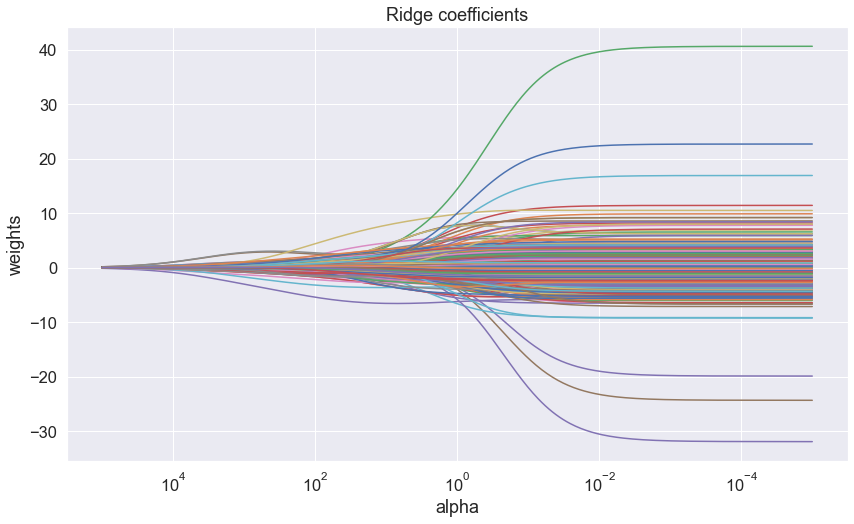

In [175]:
# Display results
plt.figure(figsize=(14,8))
plt.grid()
ax=plt.gca()

ax.plot(alphas,coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim() [::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients')
plt.grid()

##### the ballpark range for ridge coeff is 10000 to 10
##### Use RandomizedSearh and GridSearch to find optimal settings of alpha

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [179]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'alpha': np.linspace(10,10000,10000)}

gs=RandomizedSearchCV(estimator= Ridge(),
                      param_distributions=params,
                      scoring=scoring,
                      n_jobs=1,
                      cv=kf,
                      refit='r2')
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_


Wall time: 17.3 s


(0.5233880173674608, {'alpha': 622.4482448244825})

##### Using GridSearch

In [181]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'alpha': np.linspace(5,500,30)}

gs=GridSearchCV(estimator= Ridge(),
                      param_grid=params,
                      scoring=scoring,
                      n_jobs=1,
                      cv=kf,
                      refit='r2')
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_

Wall time: 48.5 s


(0.5620002627463161, {'alpha': 39.13793103448276})

In [185]:
%%time
#Fit Model
params={'alpha': 39}

ridge_model= Ridge(**params)

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

scores=cross_validate(estimator=ridge_model,
                      X=X,
                      y=y,
                      cv=kf,
                      scoring=scoring,
                      return_train_score=True)

print('Score Keys : \n', scores.keys())

print('Training r2 : mean - {:4.2f}, max - {:4.2f}, min-{:4.2f}'.format(scores['train_r2'].mean(),scores['train_r2'].max(),scores['train_r2'].min()))
print('Testing r2 : mean - {:4.2f}, max - {:4.2f}, min-{:4.2f}'.format(scores['test_r2'].mean(),scores['test_r2'].max(),scores['test_r2'].min()))

Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : mean - 0.60, max - 0.62, min-0.59
Testing r2 : mean - 0.56, max - 0.63, min-0.38
Wall time: 2.64 s


In [186]:
%%time
# Fit model
params= {'alpha': 34.82}
ridge_model= Ridge(**params)
ridge_model.fit(X_train,y_train)

# predict (training sample)
y_pred= ridge_model.predict(X_train)
model_metrics(y_train,y_pred,'training data')

# predict (testing samples)
y_pred= ridge_model.predict(X_test)
model_metrics(y_test,y_pred,'test data')

Metrics using training data ...
Mean Abs Error MAE :        5.096759101787123
Mean Sq Error MSE :         64.20170284246792
Root Mean Sq Error RMSE :   2.2576002971711184
MAPE :                      4.854101465302156
MPE :                       -0.5406478040750966
r2 value :                  0.5988983498240106


Metrics using test data ...
Mean Abs Error MAE :        5.560571203282004
Mean Sq Error MSE :         70.12605915235306
Root Mean Sq Error RMSE :   2.358086343474726
MAPE :                      5.303501457504393
MPE :                       -0.38123337759465176
r2 value :                  0.5707077022180116


Wall time: 254 ms


<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 2.2 Lasso Regression</h1></center>

##### find the ball park range for lasso regularization parameter

In [189]:
from sklearn.linear_model import Lasso

In [190]:
# Get various values of alpha
n_alphas = 100
alphas = np.logspace(-2,2,n_alphas)

In [191]:
%%time

#array for storing the regression coeff
coefs =[]

for a in alphas:
    lasso= Lasso(alpha=a, fit_intercept=True,max_iter=15000)
    lasso.fit(X,y)
    coefs.append(lasso.coef_)

Wall time: 1min 46s


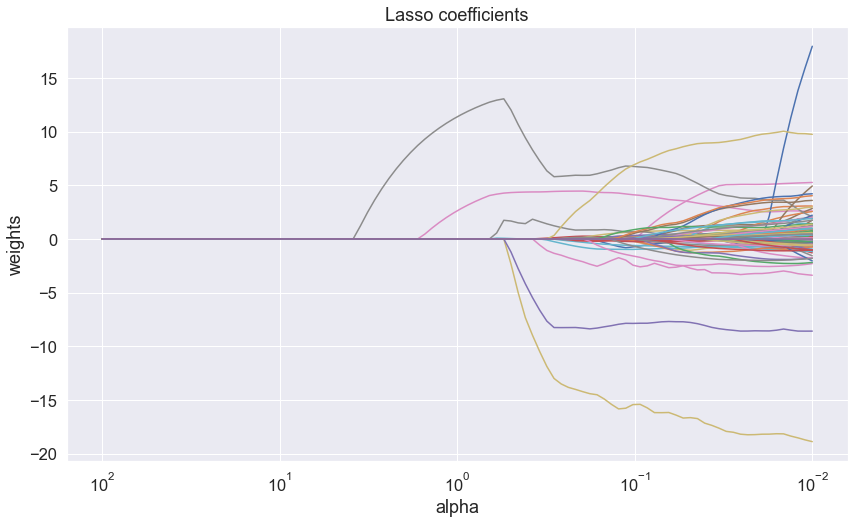

In [192]:
# Display results
plt.figure(figsize=(14,8))
plt.grid()
ax=plt.gca()

ax.plot(alphas,coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim() [::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients')
plt.grid()

##### The ballpark range for lasso regularizer is 1 to .10
##### Use RandomizedSearch and GridSearch to find optimal settings of alpha

In [194]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'alpha': np.linspace(.001,.05,100)}

gs=RandomizedSearchCV(estimator= Lasso(),
                      param_distributions=params,
                      scoring=scoring,
                      n_jobs=1,
                      cv=kf,
                      refit='r2')
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_

Wall time: 50.3 s


(0.5711919417854441, {'alpha': 0.03168686868686869})

##### Using GridSearch

In [199]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'alpha': np.linspace(.01,10,10)}

gs=GridSearchCV(estimator= Lasso(),
                      param_grid=params,
                      scoring=scoring,
                      n_jobs=-1,
                      cv=kf,
                      refit='r2')
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_

Wall time: 19.1 s


(0.5640316936066627, {'alpha': 0.01})

In [197]:
%%time
#Fit Model
params={'alpha': 0.01}

lasso_model= Lasso(**params)

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

scores=cross_validate(estimator=lasso_model,
                      X=X,
                      y=y,
                      cv=kf,
                      scoring=scoring,
                      return_train_score=True)

print('Score Keys : \n', scores.keys())

print('Training r2 : mean - {:4.2f}, max - {:4.2f}, min-{:4.2f}'.format(scores['train_r2'].mean(),scores['train_r2'].max(),scores['train_r2'].min()))
print('Testing r2 : mean - {:4.2f}, max - {:4.2f}, min-{:4.2f}'.format(scores['test_r2'].mean(),scores['test_r2'].max(),scores['test_r2'].min()))

Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : mean - 0.60, max - 0.63, min-0.59
Testing r2 : mean - 0.57, max - 0.63, min-0.39
Wall time: 28.3 s


In [198]:
%%time
# Fit model
params= {'alpha': 0.01}
lasso_model= Lasso(**params)
lasso_model.fit(X_train,y_train)

# predict (training sample)
y_pred= lasso_model.predict(X_train)
model_metrics(y_train,y_pred,'training data')

# predict (testing samples)
y_pred= lasso_model.predict(X_test)
model_metrics(y_test,y_pred,'test data')

Metrics using training data ...
Mean Abs Error MAE :        5.076478205773658
Mean Sq Error MSE :         63.625855583782716
Root Mean Sq Error RMSE :   2.25310412670468
MAPE :                      4.830357063519868
MPE :                       -0.5222206054333042
r2 value :                  0.6024959691313161


Metrics using test data ...
Mean Abs Error MAE :        5.55214197675777
Mean Sq Error MSE :         70.25113547320912
Root Mean Sq Error RMSE :   2.356298363271886
MAPE :                      5.28170196657051
MPE :                       -0.3425303551974091
r2 value :                  0.5699420196482589


Wall time: 1.43 s


<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 2.3 ElasticNet Regression</h1></center>

In [200]:
from sklearn.linear_model import ElasticNet

##### Parameters alpha= Constant that multiplies to penalty terms
##### alpha=0 is equivalent to an ordinary least square
##### l1_ratio mixing parameter 0<= l1_ratio <=1 
<ul> <li>l1_ratio=0 the penalty is an L2 penalty</li>
<li>l1_ratio=1 tit is an L1 penalty</li>
<li>fpr 0< l1_ratio< 1, the penalty is a combination of L1 and L2 </li>
</ul>

#### Use RandomizedSearch and GridSearch to find optimal settings of alpha and l1_ratio

In [203]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'alpha': np.linspace(.01,2,10),
          'l1_ratio': np.linspace(.01,.9,10)}

gs=RandomizedSearchCV(estimator= ElasticNet(),
                      param_distributions=params,
                      scoring=scoring,
                      n_jobs=-1,
                      cv=kf,
                      refit='r2')
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_

Wall time: 28 s


(0.5649083955584706, {'l1_ratio': 0.9, 'alpha': 0.01})

##### Using GridSearch

In [204]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'alpha': np.linspace(.01,.3,10),
          'l1_ratio': np.linspace(.5,.9,5)}

gs=GridSearchCV(estimator= ElasticNet(),
                      param_grid=params,
                      scoring=scoring,
                      n_jobs=-1,
                      cv=kf,
                      refit='r2')
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_

Wall time: 1min 27s


(0.5673714345786381, {'alpha': 0.042222222222222223, 'l1_ratio': 0.9})

In [207]:
%%time
#Fit Model
params={'alpha': 0.04000, 'l1_ratio': 0.99}

enet_model= ElasticNet(**params)

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

scores=cross_validate(estimator=enet_model,
                      X=X,
                      y=y,
                      cv=kf,
                      scoring=scoring,
                      return_train_score=True)

print('Score Keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))

Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : 0.5761384219217252
Testing r2 : 0.5691510275826228
Wall time: 17.1 s


In [209]:
%%time
#Fit Model
params={'alpha': 0.03000, 'l1_ratio': 0.99}
enet_model= ElasticNet(**params)
enet_model.fit(X_train,y_train)

# predict (training sample)
y_pred= enet_model.predict(X_train)
model_metrics(y_train,y_pred,'training data')

# predict (testing samples)
y_pred= enet_model.predict(X_test)
model_metrics(y_test,y_pred,'test data')

Metrics using training data ...
Mean Abs Error MAE :        5.1807390632115045
Mean Sq Error MSE :         67.33807552167032
Root Mean Sq Error RMSE :   2.276123692423482
MAPE :                      4.924823639482597
MPE :                       -0.56150594909762
r2 value :                  0.5793037876629143


Metrics using test data ...
Mean Abs Error MAE :        5.471362442927553
Mean Sq Error MSE :         68.69843823285613
Root Mean Sq Error RMSE :   2.339094363835618
MAPE :                      5.213996922849776
MPE :                       -0.4111316272175247
r2 value :                  0.5794472018034793


Wall time: 1.62 s


<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 3. Using Random Forest Regression</h1></center>

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
##### Tuning the RF parameters using gridsearch

In [215]:
kf= KFold(n_splits=5,shuffle=True, random_state=20)

In [217]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'n_estimators': [400,600,800,1000,1200],
          'max_depth': [6,8,10,11,12,13],
          'min_samples_split': [.01,.05,.10,.20,.30],
          'max_features': ['sqrt','log2'],
          'bootstrap': ['True'],
          'max_samples': [0.1,0.3,0.9,1.0]}

gs=RandomizedSearchCV(estimator= RandomForestRegressor(),
                      param_distributions=params,
                      scoring=scoring,
                      n_jobs=-1,
                      cv=kf,
                      refit='r2')

gs.fit(X_train,y_train)

gs.best_score_,gs.best_params_

Wall time: 28.2 s


(0.4702125286157626,
 {'n_estimators': 800,
  'min_samples_split': 0.1,
  'max_samples': 0.3,
  'max_features': 'sqrt',
  'max_depth': 8,
  'bootstrap': 'True'})

##### Check overfitting using cross-validate

In [218]:
%%time
#Fit Model
params = {'n_estimators': 800,
          'max_depth': 10,
          'min_samples_split': .01,
          'max_features': 'sqrt',
          'max_samples': 0.9}

rfr= RandomForestRegressor(**params)

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

scores=cross_validate(estimator=rfr,
                      X=X,
                      y=y,
                      cv=kf,
                      scoring=scoring,
                      return_train_score=True)

print('Score Keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['test_MSE'].mean()))


Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : 0.5927882199446619
Testing r2 : 0.5497733503534776
Training MSE : -65.486744205863
Testing MSE : -72.8686491143917
Wall time: 32.7 s


In [219]:
%%time
#Fit Random Forest Regressor Model
params = {'n_estimators': 800,
          'max_depth': 10,
          'min_samples_split': .01,
          'max_features': 'sqrt',
          'max_samples': 0.9}

rfr= RandomForestRegressor(**params)
rfr.fit(X_train,y_train)

# predict (training sample)
y_pred= rfr.predict(X_train)
model_metrics(y_train,y_pred,'training data')

# predict (testing samples)
y_pred= rfr.predict(X_test)
model_metrics(y_test,y_pred,'test data')

Metrics using training data ...
Mean Abs Error MAE :        5.221961159945951
Mean Sq Error MSE :         65.81295739054087
Root Mean Sq Error RMSE :   2.285161079649737
MAPE :                      4.992699803739613
MPE :                       -0.6198047134328378
r2 value :                  0.5888319990969684


Metrics using test data ...
Mean Abs Error MAE :        5.57754217939507
Mean Sq Error MSE :         69.97002671890213
Root Mean Sq Error RMSE :   2.361682065688578
MAPE :                      5.341488099455881
MPE :                       -0.5712405457967308
r2 value :                  0.5716628895291813


Wall time: 6.57 s


<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 4. Using KNN Regressor</h1></center>

In [221]:
from sklearn.neighbors import KNeighborsRegressor

##### Tuning the KNN reg parameters using gridsearch

In [223]:
%%time

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

params = {'n_neighbors': [3,5,7,9,11,13,15,17,19],
          'metric': ['hamming','miskowski'],
          'weights': ['uniform','distance'],
          'algorithm': ['brute','kd_tree','ball_tree'],
          'leaf_size': [20,30,40],
          'p': [1,2,3,4]}

gs=RandomizedSearchCV(estimator= KNeighborsRegressor(),
                      param_distributions=params,
                      scoring=scoring,
                      n_jobs=-1,
                      cv=kf,
                      refit='r2')

gs.fit(X_train,y_train)

gs.best_score_,gs.best_params_

Wall time: 30.3 s


(0.42596648248657376,
 {'weights': 'distance',
  'p': 2,
  'n_neighbors': 17,
  'metric': 'hamming',
  'leaf_size': 40,
  'algorithm': 'brute'})

##### check overfitting using cross validate

In [ ]:
%%time
#Fit KNN Model
params = {'weights': 'distance',
          'p': 4,
          'n_neighbors': 17,
          'metric': 'minkowski',
          'leaf_size': 30,
          'algorithm': 'ball_tree'}

knn= KNeighborsRegressor(**params)

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

scores=cross_validate(estimator=knn,
                      X=X,
                      y=y,
                      cv=kf,
                      scoring=scoring,
                      return_train_score=True)

print('Score Keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['test_MSE'].mean()))

##### using train/test split

In [225]:
%%time
#Fit KNN Regressor Model
params = {'weights': 'uniform',
          'p': 3,
          'n_neighbors': 17,
          'metric': 'minkowski',
          'leaf_size': 40,
          'algorithm': 'ball_tree'}

knn= KNeighborsRegressor(**params)
knn.fit(X_train,y_train)

# predict (training sample)
y_pred= knn.predict(X_train)
model_metrics(y_train,y_pred,'training data')

# predict (testing samples)
y_pred= knn.predict(X_test)
model_metrics(y_test,y_pred,'test data')

Metrics using training data ...
Mean Abs Error MAE :        5.766584671290553
Mean Sq Error MSE :         76.40133385813661
Root Mean Sq Error RMSE :   2.4013714146900624
MAPE :                      5.526191615965883
MPE :                       -0.591144839100303
r2 value :                  0.5226808678059776


Metrics using test data ...
Mean Abs Error MAE :        6.156153416235853
Mean Sq Error MSE :         82.46841281756241
Root Mean Sq Error RMSE :   2.481159691804591
MAPE :                      5.912815402230994
MPE :                       -0.6508746767018825
r2 value :                  0.49515123392333094


Wall time: 1min 34s


<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 5. Gradient Boosting Regressor</h1></center>

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

... check overfitting using cross_validate ...

In [227]:
%%time
# Fit model
params = {'n_estimators': 600, 
          'max_depth': 8, 
          'min_samples_split': .1,
          'max_features': 'sqrt',
          'learning_rate': 0.01, 
          'loss': 'ls',
          'validation_fraction': 0.2,
          'n_iter_no_change': 10}

gbr = GradientBoostingRegressor(**params)

scoring = {'r2': 'r2',
           'MSE': 'neg_mean_squared_error'}

scores = cross_validate(estimator=rfr, 
                        X=X, 
                        y=y, 
                        cv=kf,
                        scoring=scoring, 
                        return_train_score=True)

# print('Score keys : \n', scores.keys())

print('Training r2  : {}'.format(scores['train_r2'].mean()) )
print('Testing  r2  : {}'.format(scores['test_r2'].mean()) )

print('Training MSE : {}'.format(scores['train_MSE'].mean()) )
print('Testing  MSe : {}'.format(scores['test_MSE'].mean()) )

Training r2  : 0.5937931125271825
Testing  r2  : 0.5498718249640253
Training MSE : -65.32763609780486
Testing  MSe : -72.84384896454533
Wall time: 32.2 s


... using train test split ...

In [228]:
# Fit regression model
params = {'n_estimators': 600, 
          'max_depth': 8, 
          'min_samples_split': .1,
          'max_features': 'sqrt',
          'learning_rate': 0.01, 
          'loss': 'ls',
          'validation_fraction': 0.2,
          'n_iter_no_change': 10}

gbr = GradientBoostingRegressor(**params)

# Train GB regressor
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_train)
model_metrics(y_train, y_pred, 'training data')

y_pred = gbr.predict(X_test)
model_metrics(y_test, y_pred, 'test data')

Metrics using training data ...
Mean Abs Error MAE :        5.0834633188127185
Mean Sq Error MSE :         63.967360416767285
Root Mean Sq Error RMSE :   2.254653702636553
MAPE :                      4.852676940675386
MPE :                       -0.5975935060271085
r2 value :                  0.6003624096463085


Metrics using test data ...
Mean Abs Error MAE :        5.431636931301845
Mean Sq Error MSE :         67.30861743266853
Root Mean Sq Error RMSE :   2.330587250308781
MAPE :                      5.189283499374471
MPE :                       -0.49437986407990675
r2 value :                  0.5879552995353297




##### Use learning curve to see if the training samples are enough

In [235]:
def plot_learning_curve(estimator,
                       title,
                       X,
                       y,
                       ylim=None,
                       cv=None,
                       n_jobs=None,
                       train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    
    train_sizes,train_scores, test_scores = learning_curve(estimator,
                                                           X,
                                                           y,
                                                           cv=cv,
                                                           n_jobs=n_jobs,
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.mean(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,train_scores_mean, 'o-',color="r",label="Training Score")
    plt.plot(train_sizes,test_scores_mean, 'o-',color="g",label="Cross-validation Score")
    
    plt.legend(loc="best")
    
    return plt

In [233]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

Wall time: 7min 24s


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

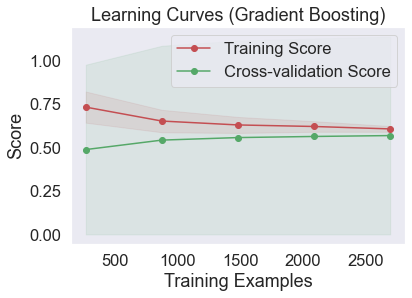

In [236]:
%%time
title="Learning Curves (Gradient Boosting)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
ss= ShuffleSplit(n_splits=100, test_size=0.2,random_state=0)

plot_learning_curve(estimator=gbr,
                    title=title,
                    X=X_train,
                    y=y_train,
                    cv=ss,
                    n_jobs=-1
                    )




<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 6. XGboost Regression model</h1></center>

In [80]:
# pip install xgboost
import xgboost as xgb

In [81]:
# Creating DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

### The params dictionary

In [82]:
# Prepare dict of params for xgboost model.
# reg_alpha - L1
# reg_lambda - L2
xgb_params = {
    'max_depth': 8,
    'min_child_weight': 1,
    'eta':.01,                        # learning_rate, 0-1
    'subsample': 1,                   # randomly sample the training data 
    'colsample_bytree': .5,
    'objective':'reg:squarederror',
    'reg_alpha': 4.1,                 # 4.1
    'reg_lambda': .0001,
    'eval_metric': 'mae',
    'validate_parameters': 1,
    'verbose_eval': True,
    'verbosity': 0                    # 0- silent, 1-warning, 2-info, 3-debug
}

Let’s train a model with it and see how well it does on our test set!

In [83]:
%%time
model_xgb = xgb.train(
                xgb_params,
                dtrain,
                num_boost_round=999,
                evals=[(dtest, "Test")],
                early_stopping_rounds=10, 
)

[0]	Test-mae:99.00267
[1]	Test-mae:98.01424
[2]	Test-mae:97.03585
[3]	Test-mae:96.06683
[4]	Test-mae:95.10568
[5]	Test-mae:94.15618
[6]	Test-mae:93.21653
[7]	Test-mae:92.28597
[8]	Test-mae:91.36499
[9]	Test-mae:90.45279
[10]	Test-mae:89.54975
[11]	Test-mae:88.65590
[12]	Test-mae:87.77105
[13]	Test-mae:86.89497
[14]	Test-mae:86.02735
[15]	Test-mae:85.16880
[16]	Test-mae:84.31831
[17]	Test-mae:83.47708
[18]	Test-mae:82.64440
[19]	Test-mae:81.81921
[20]	Test-mae:81.00188
[21]	Test-mae:80.19294
[22]	Test-mae:79.39243
[23]	Test-mae:78.60023
[24]	Test-mae:77.81693
[25]	Test-mae:77.04067
[26]	Test-mae:76.27199
[27]	Test-mae:75.51114
[28]	Test-mae:74.75764
[29]	Test-mae:74.01205
[30]	Test-mae:73.27342
[31]	Test-mae:72.54215
[32]	Test-mae:71.82008
[33]	Test-mae:71.10456
[34]	Test-mae:70.39590
[35]	Test-mae:69.69380
[36]	Test-mae:68.99801
[37]	Test-mae:68.31000
[38]	Test-mae:67.62813
[39]	Test-mae:66.95440
[40]	Test-mae:66.28651
[41]	Test-mae:65.62599
[42]	Test-mae:64.97066
[43]	Test-mae:64.3232

In [90]:
# Predict
y_pred = model_xgb.predict(dtrain)
model_metrics(y_train, y_pred, 'training data')

y_pred = model_xgb.predict(dtest)
model_metrics(y_test, y_pred, 'test data')

Metrics using training data ...
Mean Abs Error MAE :        4.041591115282522
Mean Sq Error MSE :         43.30094835206011
Root Mean Sq Error RMSE :   2.0103708899808814
MAPE :                      3.769201371189003
MPE :                       1.4782363104246705
r2 value :                  0.7294763056236567


Metrics using test data ...
Mean Abs Error MAE :        5.2084802945605935
Mean Sq Error MSE :         73.92826288291812
Root Mean Sq Error RMSE :   2.282209520302769
MAPE :                      4.851556670404446
MPE :                       1.4327644338065033
r2 value :                  0.5474316648096732




### Grid-Search
In grid-search we start by defining a dictionary holding possible parameter values we want to test. All combinations will be evaluted.

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
model_xgb = XGBRegressor()

In [ ]:
model_xgb.get_params()

In [ ]:
# reg_alpha  - L1
# reg_lambda - L2
params_grid = {
    'objective': ['reg:squarederror'],
    'n_estimators': [10, 100, 200, 300, 400, 500],
    'max_depth': np.arange(6),
    'min_child_weight': np.arange(5),
    'learning_rate': np.linspace(.01, .07, 5),    # so called `eta`                        
    'subsample': np.linspace(0.5, 1, 5),                   
    'colsample_bytree': np.linspace(0.5, 1, 5), 
    'reg_alpha':  [4.1],                 
    'reg_lambda': [.0001],
    'verbosity': [0] }

scoring = {'r2': 'r2',
           'MSE' : 'neg_mean_squared_error'}

In [ ]:
xgb_grid = RandomizedSearchCV(estimator=model_xgb,
                            param_distributions=params_grid,
                            scoring=scoring,
                            n_jobs=-1,
                            cv=kf,
                            refit='r2')

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> 7. PCA then XGboost Regression model</h1></center>

In [274]:
# dimensionality reduction
from sklearn.decomposition import PCA

In [275]:
file_train=r'.\input\merc-train.csv'
df_train=pd.read_csv(file_train)
print("Training Data has ", df_train.shape[0],"Rows and ",df_train.shape[1], "Columns")

Training Data has  4209 Rows and  378 Columns


In [276]:
# remove columns ID and Y from the data as they are not used for learning
usable_columns = list(set(df_train.columns) - set(['ID', 'y']))
y_train = df_train['y'].values
x_train = df_train[usable_columns]
print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")

Training Data x_train has  4209 Rows and  376 Columns
Training Data y_train has  4209 Rows


In [277]:
# If for any column(s), the variance is equal to zero, remove those variable(s).
# Apply label encoder

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        # Column with only one value is useless so we drop it
        x_train.drop(column, axis=1,inplace=True) 

        
print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")

Training Data x_train has  4209 Rows and  364 Columns
Training Data y_train has  4209 Rows


In [278]:
objList = x_train.select_dtypes(include = "object").columns
print (objList)

Index(['X2', 'X4', 'X6', 'X5', 'X0', 'X1', 'X3', 'X8'], dtype='object')


In [279]:
# Now let us have a look at the data type of all the variables present in the training dataset
dtype_data=x_train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,356
1,object,8


In [280]:
objList = x_train.select_dtypes(include = "object").columns
print (objList)
print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")

Index(['X2', 'X4', 'X6', 'X5', 'X0', 'X1', 'X3', 'X8'], dtype='object')
Training Data x_train has  4209 Rows and  364 Columns
Training Data y_train has  4209 Rows


In [281]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for catgry in objList:
    x_train[catgry] = le.fit_transform(x_train[catgry].astype(object))

print (x_train.info())
print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X68 to X272
dtypes: int32(8), int64(356)
memory usage: 11.6 MB
None
Training Data x_train has  4209 Rows and  364 Columns
Training Data y_train has  4209 Rows


In [282]:
# Now let us have a look at the data type of all the variables present in the training dataset
dtype_data=x_train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()


,Column Type,Count
0,int32,8
1,int64,356


In [283]:
print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")

Training Data x_train has  4209 Rows and  364 Columns
Training Data y_train has  4209 Rows


In [284]:
# Perform dimensionality reduction Linear dimensionality reduction using Singular Value Decomposition of 
# the data to project it to a lower dimensional space.
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca_results_train = pca.fit_transform(x_train)

print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")
print("After PCA Data has ", pca_results_train.shape[0],"Rows and ",pca_results_train.shape[1], "Columns")

Training Data x_train has  4209 Rows and  364 Columns
Training Data y_train has  4209 Rows
After PCA Data has  4209 Rows and  12 Columns


In [285]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                    pca_results_train, 
                                    y_train, test_size=0.2, 
                                    random_state=1)



In [286]:
print("Training Data x_train has ", x_train.shape[0],"Rows and ",x_train.shape[1], "Columns")
print("Training Data y_train has ", y_train.shape[0],"Rows")
print("Testing Data x_test has ", x_test.shape[0],"Rows and ",x_test.shape[1], "Columns")
print("Testing Data y_test has ", y_test.shape[0],"Rows")

Training Data x_train has  3367 Rows and  12 Columns
Training Data y_train has  3367 Rows
Testing Data x_test has  842 Rows and  12 Columns
Testing Data y_test has  842 Rows


In [287]:
import xgboost as xgb
from sklearn.metrics import r2_score

d_train = xgb.DMatrix(x_train, label=y_train)
d_test =  xgb.DMatrix(x_test, label=y_test)


In [288]:
# Prepare dict of params for xgboost model.
# reg_alpha - L1
# reg_lambda - L2
xgb_params = {
    'max_depth': 8,
    'min_child_weight': 1,
    'eta':.01,                        # learning_rate, 0-1
    'subsample': 1,                   # randomly sample the training data 
    'colsample_bytree': .5,
    'objective':'reg:squarederror',
    'reg_alpha': 4.1,                 # 4.1
    'reg_lambda': .0001,
    'eval_metric': 'mae',
    'validate_parameters': 1,
    'verbose_eval': True,
    'verbosity': 0                    # 0- silent, 1-warning, 2-info, 3-debug
}

In [289]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [290]:
watchlist = [(d_train, 'train'), (d_test, 'test')]

clf = xgb.train(xgb_params, d_train, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)




[0]	train-mae:99.20971	train-r2:-61.48478	test-mae:99.00015	test-r2:-59.99411
[10]	train-mae:89.72797	train-r2:-50.21197	test-mae:89.54349	test-r2:-49.01876
[20]	train-mae:81.15358	train-r2:-40.98580	test-mae:80.99072	test-r2:-40.03451
[30]	train-mae:73.39953	train-r2:-33.43649	test-mae:73.25396	test-r2:-32.68132
[40]	train-mae:66.38704	train-r2:-27.25854	test-mae:66.27177	test-r2:-26.67627
[50]	train-mae:60.04486	train-r2:-22.20128	test-mae:59.93973	test-r2:-21.74935
[60]	train-mae:54.30999	train-r2:-18.05880	test-mae:54.21663	test-r2:-17.71918
[70]	train-mae:49.12345	train-r2:-14.66923	test-mae:49.03503	test-r2:-14.41819
[80]	train-mae:44.43281	train-r2:-11.89514	test-mae:44.35345	test-r2:-11.71995
[90]	train-mae:40.19149	train-r2:-9.62258	test-mae:40.11673	test-r2:-9.51007
[100]	train-mae:36.35522	train-r2:-7.75949	test-mae:36.28122	test-r2:-7.69677
[110]	train-mae:32.88482	train-r2:-6.23584	test-mae:32.81387	test-r2:-6.21493
[120]	train-mae:29.74750	train-r2:-4.98556	test-mae:29.67

In [291]:
%%time
model_xgb = xgb.train(
                xgb_params,d_train,
                num_boost_round=999,
                evals=[(d_test, "test")],
                early_stopping_rounds=10
)

[0]	test-mae:99.00015
[1]	test-mae:98.01228
[2]	test-mae:97.03220
[3]	test-mae:96.06580
[4]	test-mae:95.10525
[5]	test-mae:94.15735
[6]	test-mae:93.21710
[7]	test-mae:92.28464
[8]	test-mae:91.35979
[9]	test-mae:90.44579
[10]	test-mae:89.54349
[11]	test-mae:88.65130
[12]	test-mae:87.76720
[13]	test-mae:86.89077
[14]	test-mae:86.02045
[15]	test-mae:85.15943
[16]	test-mae:84.30990
[17]	test-mae:83.46717
[18]	test-mae:82.63269
[19]	test-mae:81.80687
[20]	test-mae:80.99072
[21]	test-mae:80.18336
[22]	test-mae:79.38227
[23]	test-mae:78.58817
[24]	test-mae:77.80271
[25]	test-mae:77.02559
[26]	test-mae:76.25734
[27]	test-mae:75.49621
[28]	test-mae:74.73872
[29]	test-mae:73.99249
[30]	test-mae:73.25396
[31]	test-mae:72.52310
[32]	test-mae:71.79974
[33]	test-mae:71.08481
[34]	test-mae:70.37629
[35]	test-mae:69.67474
[36]	test-mae:68.98093
[37]	test-mae:68.29268
[38]	test-mae:67.61305
[39]	test-mae:66.93877
[40]	test-mae:66.27177
[41]	test-mae:65.60995
[42]	test-mae:64.95259
[43]	test-mae:64.3023

In [292]:
# Predict
y_pred = model_xgb.predict(d_train)

In [293]:
model_metrics(y_train, y_pred, 'training data')

Metrics using training data ...
Mean Abs Error MAE :        3.9738112279417828
Mean Sq Error MSE :         33.31399783944302
Root Mean Sq Error RMSE :   1.9934420553258585
MAPE :                      3.7534360899914625
MPE :                       1.0704770577988503
r2 value :                  0.7918700140999828




In [294]:
y_pred = model_xgb.predict(d_test)

In [295]:
model_metrics(y_test, y_pred, 'test data')

Metrics using test data ...
Mean Abs Error MAE :        6.346803132190841
Mean Sq Error MSE :         87.40672985661756
Root Mean Sq Error RMSE :   2.5192862346686296
MAPE :                      6.024660130561501
MPE :                       0.6663134298835018
r2 value :                  0.4649202257289856


